# Adevinta: Image similarity

In [89]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [90]:
%matplotlib inline

In [91]:
import pandas as pd
import numpy as np
import glob

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [92]:
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

## Adevinta: Building the Images dataframe

In [93]:
HOME_DIR = "/Users/davidquer/Downloads/job_search/adevinta/images"

In [94]:
files = [f for f in glob.glob(HOME_DIR + "/" + "**/*.jpg", recursive=True)]

df_images = pd.DataFrame(files)
df_images.columns = ["image_path"]

df_images["image_name"] = df_images.image_path.apply(lambda x : x.split("/")[-1])
df_images["idproperty"] = df_images.image_path.apply(lambda x : x.split("/")[-2])

df_images.head()

,image_path,image_name,idproperty
0,/Users/davidquer/Downloads/job_search/adevinta...,220289490.jpg,pdgmndkaii
1,/Users/davidquer/Downloads/job_search/adevinta...,220289487.jpg,pdgmndkaii
2,/Users/davidquer/Downloads/job_search/adevinta...,220289451.jpg,pdgmndkaii
3,/Users/davidquer/Downloads/job_search/adevinta...,220289479.jpg,pdgmndkaii
4,/Users/davidquer/Downloads/job_search/adevinta...,220289455.jpg,pdgmndkaii


In [95]:
df_images.shape

(7805, 3)

## Adevinta: Building the Neural Network for Feature extraction (as a black box)

**Using a pre-trained CNN in VGG16 to extract the feature of a given image**

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”.

VGG16 refers to a VGG model with 16 weight layers and the architecture of VGG16: the input layer takes an image in the size of (224 x 224 x 3), and the output layer is a softmax prediction on 1000 classes. 

From the input layer to the last max pooling layer (labeled by 7 x 7 x 512) is regarded as the feature extraction part of the model, while the rest of the network is regarded as the classification part of the model.

In [96]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [97]:
model_vgg16 = VGG16(weights='imagenet', include_top=False)
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

**Example image file feature creation**

In [98]:
img_path = HOME_DIR + '/abkvpehvdk/34462969.jpg'
img_path

'/Users/davidquer/Downloads/job_search/adevinta/images/abkvpehvdk/34462969.jpg'

In [99]:
img = image.load_img(img_path, target_size=(224, 224))

img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model_vgg16.predict(img_data)

print(vgg16_feature.shape)

(1, 7, 7, 512)


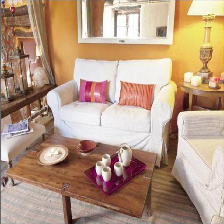

In [100]:
img

We can see that the result of applying the filters in the first convolutional layer is a lot of versions of the bird image with different features highlighted.

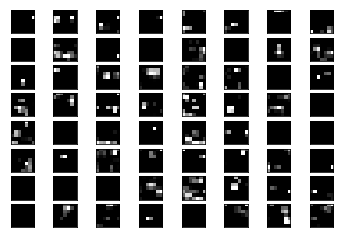

In [101]:
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(vgg16_feature[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [102]:
len(files)

7805

In [198]:
model_vgg16.save_weights("./models/images_model_vgg16.h5")

## Adevinta: Feature extraction VGG16

In [166]:
df_images_features = df_images.copy()

In [167]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [168]:
vgg16_feature_list = []

for i in range(df_images_features.shape[0]):
    image_path = df_images.iloc[i].image_path
    image_name = df_images.iloc[i].image_name
    idproperty = df_images.iloc[i].idproperty
               
    try:
        img = image.load_img(image_path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)

        vgg16_feature = model_vgg16.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list.append(vgg16_feature_np.flatten())

        print("image: {}, property: {}".format(image_name, idproperty))
    except:
        # in case error: add a null feature
        vgg16_feature_list.append(np.array([0.0] * 25088))
        print("image: {}, property: {} ERROR".format(image_name, idproperty))

image: 220289490.jpg, property: pdgmndkaii
image: 220289487.jpg, property: pdgmndkaii
image: 220289451.jpg, property: pdgmndkaii
image: 220289479.jpg, property: pdgmndkaii
image: 220289455.jpg, property: pdgmndkaii
image: 220289469.jpg, property: pdgmndkaii
image: 220289481.jpg, property: pdgmndkaii
image: 220289393.jpg, property: pdgmndkaii
image: 220289392.jpg, property: pdgmndkaii
image: 220289472.jpg, property: pdgmndkaii
image: 220289473.jpg, property: pdgmndkaii
image: 220289470.jpg, property: pdgmndkaii
image: 220289474.jpg, property: pdgmndkaii
image: 220289488.jpg, property: pdgmndkaii
image: 220289476.jpg, property: pdgmndkaii
image: 256925746.jpg, property: cqdzjyezkx
image: 283695709.jpg, property: sohqcuggfj
image: 283695713.jpg, property: sohqcuggfj
image: 283695712.jpg, property: sohqcuggfj
image: 283695714.jpg, property: sohqcuggfj
image: 248574393.jpg, property: hgjmimtjjf
image: 248574540.jpg, property: hgjmimtjjf
image: 214556746.jpg, property: hgjmimtjjf
image: 2485

image: 141996345.jpg, property: jtipoczpzh
image: 141996378.jpg, property: jtipoczpzh
image: 141996420.jpg, property: jtipoczpzh
image: 141996540.jpg, property: jtipoczpzh
image: 141996395.jpg, property: jtipoczpzh
image: 141996469.jpg, property: jtipoczpzh
image: 141996297.jpg, property: jtipoczpzh
image: 141996479.jpg, property: jtipoczpzh
image: 141996329.jpg, property: jtipoczpzh
image: 141996507.jpg, property: jtipoczpzh
image: 141996458.jpg, property: jtipoczpzh
image: 141996406.jpg, property: jtipoczpzh
image: 164441173.jpg, property: mdooxkdket
image: 164441202.jpg, property: mdooxkdket
image: 164441003.jpg, property: mdooxkdket
image: 164440742.jpg, property: mdooxkdket
image: 164440781.jpg, property: mdooxkdket
image: 164441117.jpg, property: mdooxkdket
image: 164440963.jpg, property: mdooxkdket
image: 164441095.jpg, property: mdooxkdket
image: 164440566.jpg, property: mdooxkdket
image: 164440821.jpg, property: mdooxkdket
image: 164440661.jpg, property: mdooxkdket
image: 1644

image: 4804481.jpg, property: edwosrcnjc
image: 4804490.jpg, property: edwosrcnjc
image: 4804493.jpg, property: edwosrcnjc
image: 4804487.jpg, property: edwosrcnjc
image: 69368598.jpg, property: wiqmlyishb
image: 69369644.jpg, property: wiqmlyishb
image: 69368271.jpg, property: wiqmlyishb
image: 69370204.jpg, property: wiqmlyishb
image: 69368467.jpg, property: wiqmlyishb
image: 69369432.jpg, property: wiqmlyishb
image: 69368704.jpg, property: wiqmlyishb
image: 69369362.jpg, property: wiqmlyishb
image: 69370053.jpg, property: wiqmlyishb
image: 69370444.jpg, property: wiqmlyishb
image: 69368008.jpg, property: wiqmlyishb
image: 69368792.jpg, property: wiqmlyishb
image: 39024517.jpg, property: inksutzerf
image: 21028067.jpg, property: inksutzerf
image: 21028070.jpg, property: inksutzerf
image: 39024571.jpg, property: inksutzerf
image: 39024613.jpg, property: inksutzerf
image: 21028063.jpg, property: inksutzerf
image: 39024540.jpg, property: inksutzerf
image: 21028069.jpg, property: inksutz

image: 53013959.jpg, property: ndxysesptn
image: 53013965.jpg, property: ndxysesptn
image: 53013971.jpg, property: ndxysesptn
image: 53013967.jpg, property: ndxysesptn
image: 53013973.jpg, property: ndxysesptn
image: 53013972.jpg, property: ndxysesptn
image: 53013966.jpg, property: ndxysesptn
image: 53013938.jpg, property: ndxysesptn
image: 53013939.jpg, property: ndxysesptn
image: 221798325.jpg, property: fxmjgpdsyx
image: 221797823.jpg, property: fxmjgpdsyx
image: 221798521.jpg, property: fxmjgpdsyx
image: 221798080.jpg, property: fxmjgpdsyx
image: 221797675.jpg, property: fxmjgpdsyx
image: 221798143.jpg, property: fxmjgpdsyx
image: 221798602.jpg, property: fxmjgpdsyx
image: 221797525.jpg, property: fxmjgpdsyx
image: 221797737.jpg, property: fxmjgpdsyx
image: 221797631.jpg, property: fxmjgpdsyx
image: 221798715.jpg, property: fxmjgpdsyx
image: 221797949.jpg, property: fxmjgpdsyx
image: 13750347.jpg, property: pcvxmsyfbv
image: 13750324.jpg, property: pcvxmsyfbv
image: 13750272.jpg, p

image: 12487458.jpg, property: ieekepllqp
image: 12487495.jpg, property: ieekepllqp
image: 12487478.jpg, property: ieekepllqp
image: 12487552.jpg, property: ieekepllqp
image: 36287720.jpg, property: mrmjthcwpb
image: 36287692.jpg, property: mrmjthcwpb
image: 75720420.jpg, property: mrmjthcwpb
image: 36287805.jpg, property: mrmjthcwpb
image: 75720551.jpg, property: mrmjthcwpb
image: 36287753.jpg, property: mrmjthcwpb
image: 36287584.jpg, property: mrmjthcwpb
image: 36287750.jpg, property: mrmjthcwpb
image: 36287618.jpg, property: mrmjthcwpb
image: 36287624.jpg, property: mrmjthcwpb
image: 36287567.jpg, property: mrmjthcwpb
image: 75720663.jpg, property: mrmjthcwpb
image: 36287660.jpg, property: mrmjthcwpb
image: 36287699.jpg, property: mrmjthcwpb
image: 246406296.jpg, property: zohbzuhsry
image: 246406279.jpg, property: zohbzuhsry
image: 246406278.jpg, property: zohbzuhsry
image: 246406276.jpg, property: zohbzuhsry
image: 246406277.jpg, property: zohbzuhsry
image: 246406275.jpg, propert

image: 82808555.jpg, property: phukchotwy
image: 82808623.jpg, property: phukchotwy
image: 82808580.jpg, property: phukchotwy
image: 82808646.jpg, property: phukchotwy
image: 252652078.jpg, property: zjzgtitxxm
image: 252652441.jpg, property: zjzgtitxxm
image: 252652335.jpg, property: zjzgtitxxm
image: 252652352.jpg, property: zjzgtitxxm
image: 252652219.jpg, property: zjzgtitxxm
image: 252652218.jpg, property: zjzgtitxxm
image: 252652220.jpg, property: zjzgtitxxm
image: 252652425.jpg, property: zjzgtitxxm
image: 252652366.jpg, property: zjzgtitxxm
image: 252652065.jpg, property: zjzgtitxxm
image: 252652115.jpg, property: zjzgtitxxm
image: 264416227.jpg, property: panqyotpge
image: 264416109.jpg, property: panqyotpge
image: 264416322.jpg, property: panqyotpge
image: 111087157.jpg, property: dtvfxmsiow
image: 111087141.jpg, property: dtvfxmsiow
image: 111087595.jpg, property: dtvfxmsiow
image: 111086983.jpg, property: dtvfxmsiow
image: 111087080.jpg, property: dtvfxmsiow
image: 11108695

image: 298485838.jpg, property: tuqtonyuin
image: 298485484.jpg, property: tuqtonyuin
image: 298485457.jpg, property: tuqtonyuin
image: 298485721.jpg, property: tuqtonyuin
image: 298485681.jpg, property: tuqtonyuin
image: 298485935.jpg, property: tuqtonyuin
image: 298485707.jpg, property: tuqtonyuin
image: 298485853.jpg, property: tuqtonyuin
image: 298486284.jpg, property: tuqtonyuin
image: 298486078.jpg, property: tuqtonyuin
image: 298486097.jpg, property: tuqtonyuin
image: 298485825.jpg, property: tuqtonyuin
image: 298485372.jpg, property: tuqtonyuin
image: 186267317.jpg, property: czurezdard
image: 186267297.jpg, property: czurezdard
image: 186267242.jpg, property: czurezdard
image: 186267209.jpg, property: czurezdard
image: 186267340.jpg, property: czurezdard
image: 53754173.jpg, property: pqczjrgnkk
image: 57293129.jpg, property: pqczjrgnkk
image: 57293128.jpg, property: pqczjrgnkk
image: 57293158.jpg, property: pqczjrgnkk
image: 57293161.jpg, property: pqczjrgnkk
image: 57293148.

image: 282956416.jpg, property: fqrtdqvbfc
image: 282956516.jpg, property: fqrtdqvbfc
image: 292702081.jpg, property: fqrtdqvbfc
image: 282956447.jpg, property: fqrtdqvbfc
image: 282956444.jpg, property: fqrtdqvbfc
image: 290902674.jpg, property: fqrtdqvbfc
image: 290902703.jpg, property: fqrtdqvbfc
image: 282956409.jpg, property: fqrtdqvbfc
image: 290902710.jpg, property: fqrtdqvbfc
image: 271998077.jpg, property: gpqiyjiush
image: 272001341.jpg, property: gpqiyjiush
image: 271999385.jpg, property: gpqiyjiush
image: 272002328.jpg, property: gpqiyjiush
image: 272002499.jpg, property: gpqiyjiush
image: 271998066.jpg, property: gpqiyjiush
image: 272002538.jpg, property: gpqiyjiush
image: 271998073.jpg, property: gpqiyjiush
image: 271998067.jpg, property: gpqiyjiush
image: 272000299.jpg, property: gpqiyjiush
image: 272002600.jpg, property: gpqiyjiush
image: 272001724.jpg, property: gpqiyjiush
image: 271998177.jpg, property: gpqiyjiush
image: 271998598.jpg, property: gpqiyjiush
image: 2719

image: 57431759.jpg, property: mnavvnijpe
image: 57431973.jpg, property: mnavvnijpe
image: 57431796.jpg, property: mnavvnijpe
image: 57431744.jpg, property: mnavvnijpe
image: 57432016.jpg, property: mnavvnijpe
image: 57431906.jpg, property: mnavvnijpe
image: 57431691.jpg, property: mnavvnijpe
image: 57431874.jpg, property: mnavvnijpe
image: 324469003.jpg, property: nfniprjzjq
image: 324469001.jpg, property: nfniprjzjq
image: 324469019.jpg, property: nfniprjzjq
image: 324469023.jpg, property: nfniprjzjq
image: 324469020.jpg, property: nfniprjzjq
image: 324469021.jpg, property: nfniprjzjq
image: 324468995.jpg, property: nfniprjzjq
image: 46564591.jpg, property: myjsbvrxfr
image: 46564555.jpg, property: myjsbvrxfr
image: 46564594.jpg, property: myjsbvrxfr
image: 46564581.jpg, property: myjsbvrxfr
image: 46564567.jpg, property: myjsbvrxfr
image: 46564598.jpg, property: myjsbvrxfr
image: 46564610.jpg, property: myjsbvrxfr
image: 46564572.jpg, property: myjsbvrxfr
image: 46564606.jpg, proper

image: 61886962.jpg, property: kjdwfthyvp
image: 61887364.jpg, property: kjdwfthyvp
image: 61887399.jpg, property: kjdwfthyvp
image: 61887362.jpg, property: kjdwfthyvp
image: 61887377.jpg, property: kjdwfthyvp
image: 61887375.jpg, property: kjdwfthyvp
image: 61887598.jpg, property: kjdwfthyvp
image: 334433261.jpg, property: jxyqpzaafp
image: 334431571.jpg, property: jxyqpzaafp
image: 334432125.jpg, property: jxyqpzaafp
image: 334441493.jpg, property: jxyqpzaafp
image: 334431832.jpg, property: jxyqpzaafp
image: 334433943.jpg, property: jxyqpzaafp
image: 334431628.jpg, property: jxyqpzaafp
image: 334432040.jpg, property: jxyqpzaafp
image: 334432275.jpg, property: jxyqpzaafp
image: 334432941.jpg, property: jxyqpzaafp
image: 334433256.jpg, property: jxyqpzaafp
image: 334433280.jpg, property: jxyqpzaafp
image: 334431656.jpg, property: jxyqpzaafp
image: 334447107.jpg, property: jxyqpzaafp
image: 334432215.jpg, property: jxyqpzaafp
image: 334431654.jpg, property: jxyqpzaafp
image: 289256990.j

image: 185973174.jpg, property: nuuynbpchb
image: 185973200.jpg, property: nuuynbpchb
image: 185973177.jpg, property: nuuynbpchb
image: 185973166.jpg, property: nuuynbpchb
image: 185973164.jpg, property: nuuynbpchb
image: 185973074.jpg, property: nuuynbpchb
image: 185973073.jpg, property: nuuynbpchb
image: 102235360.jpg, property: bpcqadbkis
image: 102235369.jpg, property: bpcqadbkis
image: 33901184.jpg, property: bpcqadbkis
image: 214650831.jpg, property: ftrkosaifw
image: 214651043.jpg, property: ftrkosaifw
image: 214651231.jpg, property: ftrkosaifw
image: 214651393.jpg, property: ftrkosaifw
image: 214651636.jpg, property: ftrkosaifw
image: 214650900.jpg, property: ftrkosaifw
image: 214650977.jpg, property: ftrkosaifw
image: 224467178.jpg, property: vklrvblzjk
image: 224467345.jpg, property: vklrvblzjk
image: 224467168.jpg, property: vklrvblzjk
image: 224467176.jpg, property: vklrvblzjk
image: 224467160.jpg, property: vklrvblzjk
image: 186285696.jpg, property: qeiiwpiqdo
image: 18628

image: 268426823.jpg, property: cdlnxjxrlq
image: 268427476.jpg, property: cdlnxjxrlq
image: 268427299.jpg, property: cdlnxjxrlq
image: 268426025.jpg, property: cdlnxjxrlq
image: 268426421.jpg, property: cdlnxjxrlq
image: 268427707.jpg, property: cdlnxjxrlq
image: 268426141.jpg, property: cdlnxjxrlq
image: 268426544.jpg, property: cdlnxjxrlq
image: 268427504.jpg, property: cdlnxjxrlq
image: 268429067.jpg, property: cdlnxjxrlq
image: 268426319.jpg, property: cdlnxjxrlq
image: 268426708.jpg, property: cdlnxjxrlq
image: 268427760.jpg, property: cdlnxjxrlq
image: 268426254.jpg, property: cdlnxjxrlq
image: 268427610.jpg, property: cdlnxjxrlq
image: 268425825.jpg, property: cdlnxjxrlq
image: 268427798.jpg, property: cdlnxjxrlq
image: 107300413.jpg, property: wjnuhwezpm
image: 107300360.jpg, property: wjnuhwezpm
image: 107300707.jpg, property: wjnuhwezpm
image: 107300449.jpg, property: wjnuhwezpm
image: 107300528.jpg, property: wjnuhwezpm
image: 107300489.jpg, property: wjnuhwezpm
image: 1073

image: 260895753.jpg, property: zocygvvuht
image: 79520923.jpg, property: riudjlaxec
image: 79520855.jpg, property: riudjlaxec
image: 79521182.jpg, property: riudjlaxec
image: 79521233.jpg, property: riudjlaxec
image: 79521018.jpg, property: riudjlaxec
image: 79520879.jpg, property: riudjlaxec
image: 79521135.jpg, property: riudjlaxec
image: 79521080.jpg, property: riudjlaxec
image: 79521056.jpg, property: riudjlaxec
image: 79520827.jpg, property: riudjlaxec
image: 79520944.jpg, property: riudjlaxec
image: 79521114.jpg, property: riudjlaxec
image: 79520977.jpg, property: riudjlaxec
image: 79520817.jpg, property: riudjlaxec
image: 79521098.jpg, property: riudjlaxec
image: 79520902.jpg, property: riudjlaxec
image: 79521212.jpg, property: riudjlaxec
image: 283126660.jpg, property: xnatuhueih
image: 283126515.jpg, property: xnatuhueih
image: 283126689.jpg, property: xnatuhueih
image: 283165940.jpg, property: xnatuhueih
image: 283126470.jpg, property: xnatuhueih
image: 283126415.jpg, proper

image: 194196011.jpg, property: eofasajfth
image: 194197508.jpg, property: eofasajfth
image: 194195490.jpg, property: eofasajfth
image: 194192936.jpg, property: eofasajfth
image: 194196610.jpg, property: eofasajfth
image: 194193595.jpg, property: eofasajfth
image: 194195802.jpg, property: eofasajfth
image: 194194850.jpg, property: eofasajfth
image: 194195024.jpg, property: eofasajfth
image: 254579731.jpg, property: lubmhoijbe
image: 254579643.jpg, property: lubmhoijbe
image: 254579815.jpg, property: lubmhoijbe
image: 254579619.jpg, property: lubmhoijbe
image: 254579880.jpg, property: lubmhoijbe
image: 254579671.jpg, property: lubmhoijbe
image: 254579666.jpg, property: lubmhoijbe
image: 254579893.jpg, property: lubmhoijbe
image: 254579933.jpg, property: lubmhoijbe
image: 214436659.jpg, property: jrqcdojpkg
image: 214436628.jpg, property: jrqcdojpkg
image: 214436636.jpg, property: jrqcdojpkg
image: 214436635.jpg, property: jrqcdojpkg
image: 218603767.jpg, property: bewuyvcwzx
image: 2186

image: 105537821.jpg, property: wbrvnyvzjx
image: 105537804.jpg, property: wbrvnyvzjx
image: 105537347.jpg, property: wbrvnyvzjx
image: 105537384.jpg, property: wbrvnyvzjx
image: 105537569.jpg, property: wbrvnyvzjx
image: 105537780.jpg, property: wbrvnyvzjx
image: 105537781.jpg, property: wbrvnyvzjx
image: 105537583.jpg, property: wbrvnyvzjx
image: 105537391.jpg, property: wbrvnyvzjx
image: 105537420.jpg, property: wbrvnyvzjx
image: 105537187.jpg, property: wbrvnyvzjx
image: 105537805.jpg, property: wbrvnyvzjx
image: 105538077.jpg, property: wbrvnyvzjx
image: 105537387.jpg, property: wbrvnyvzjx
image: 105537754.jpg, property: wbrvnyvzjx
image: 105537219.jpg, property: wbrvnyvzjx
image: 105537351.jpg, property: wbrvnyvzjx
image: 105537379.jpg, property: wbrvnyvzjx
image: 105537806.jpg, property: wbrvnyvzjx
image: 105537382.jpg, property: wbrvnyvzjx
image: 105537221.jpg, property: wbrvnyvzjx
image: 105537585.jpg, property: wbrvnyvzjx
image: 105537803.jpg, property: wbrvnyvzjx
image: 1055

image: 97246094.jpg, property: xshjetqsdx
image: 97245949.jpg, property: xshjetqsdx
image: 97245970.jpg, property: xshjetqsdx
image: 97246048.jpg, property: xshjetqsdx
image: 97246077.jpg, property: xshjetqsdx
image: 97246399.jpg, property: xshjetqsdx
image: 97246789.jpg, property: xshjetqsdx
image: 97245889.jpg, property: xshjetqsdx
image: 97245877.jpg, property: xshjetqsdx
image: 97246826.jpg, property: xshjetqsdx
image: 97245910.jpg, property: xshjetqsdx
image: 97245938.jpg, property: xshjetqsdx
image: 226143368.jpg, property: fkbrtkeomm
image: 226143396.jpg, property: fkbrtkeomm
image: 226143398.jpg, property: fkbrtkeomm
image: 226143164.jpg, property: fkbrtkeomm
image: 226143503.jpg, property: fkbrtkeomm
image: 226143274.jpg, property: fkbrtkeomm
image: 39559209.jpg, property: wurlsacbpw
image: 39559196.jpg, property: wurlsacbpw
image: 39559212.jpg, property: wurlsacbpw
image: 39559213.jpg, property: wurlsacbpw
image: 39559207.jpg, property: wurlsacbpw
image: 39559211.jpg, propert

image: 53154140.jpg, property: trofiadkfd
image: 53154350.jpg, property: trofiadkfd
image: 53154492.jpg, property: trofiadkfd
image: 70198384.jpg, property: trofiadkfd
image: 53154280.jpg, property: trofiadkfd
image: 53154487.jpg, property: trofiadkfd
image: 53154255.jpg, property: trofiadkfd
image: 53154127.jpg, property: trofiadkfd
image: 53154443.jpg, property: trofiadkfd
image: 53154319.jpg, property: trofiadkfd
image: 53154481.jpg, property: trofiadkfd
image: 53154291.jpg, property: trofiadkfd
image: 53154509.jpg, property: trofiadkfd
image: 53154496.jpg, property: trofiadkfd
image: 68912091.jpg, property: vxwdzeigto
image: 68912085.jpg, property: vxwdzeigto
image: 68911956.jpg, property: vxwdzeigto
image: 68912045.jpg, property: vxwdzeigto
image: 68911982.jpg, property: vxwdzeigto
image: 68911944.jpg, property: vxwdzeigto
image: 68912108.jpg, property: vxwdzeigto
image: 68911990.jpg, property: vxwdzeigto
image: 68911936.jpg, property: vxwdzeigto
image: 68912023.jpg, property: vxw

image: 318332477.jpg, property: pnnfftcmbn
image: 318332462.jpg, property: pnnfftcmbn
image: 318332448.jpg, property: pnnfftcmbn
image: 318332138.jpg, property: pnnfftcmbn
image: 338360359.jpg, property: idifmlbbyc
image: 338360239.jpg, property: idifmlbbyc
image: 338360048.jpg, property: idifmlbbyc
image: 338360260.jpg, property: idifmlbbyc
image: 338360062.jpg, property: idifmlbbyc
image: 338360272.jpg, property: idifmlbbyc
image: 338360123.jpg, property: idifmlbbyc
image: 338360251.jpg, property: idifmlbbyc
image: 338360253.jpg, property: idifmlbbyc
image: 338360252.jpg, property: idifmlbbyc
image: 338360233.jpg, property: idifmlbbyc
image: 338360227.jpg, property: idifmlbbyc
image: 338360031.jpg, property: idifmlbbyc
image: 338360226.jpg, property: idifmlbbyc
image: 283218497.jpg, property: xyfrjsvqym
image: 283217982.jpg, property: xyfrjsvqym
image: 283220052.jpg, property: xyfrjsvqym
image: 283219259.jpg, property: xyfrjsvqym
image: 283218783.jpg, property: xyfrjsvqym
image: 2832

image: 194124870.jpg, property: unfmyptxxv
image: 194124850.jpg, property: unfmyptxxv
image: 194124855.jpg, property: unfmyptxxv
image: 194124825.jpg, property: unfmyptxxv
image: 194124831.jpg, property: unfmyptxxv
image: 70248316.jpg, property: szdfrtjqes
image: 99982871.jpg, property: szdfrtjqes
image: 99982874.jpg, property: szdfrtjqes
image: 70248266.jpg, property: szdfrtjqes
image: 99982877.jpg, property: szdfrtjqes
image: 99982985.jpg, property: szdfrtjqes
image: 70248197.jpg, property: szdfrtjqes
image: 99982847.jpg, property: szdfrtjqes
image: 99982892.jpg, property: szdfrtjqes
image: 70248282.jpg, property: szdfrtjqes
image: 99982893.jpg, property: szdfrtjqes
image: 99982844.jpg, property: szdfrtjqes
image: 99982840.jpg, property: szdfrtjqes
image: 99982895.jpg, property: szdfrtjqes
image: 99982842.jpg, property: szdfrtjqes
image: 299793961.jpg, property: pyydxxbrbh
image: 299793960.jpg, property: pyydxxbrbh
image: 299793962.jpg, property: pyydxxbrbh
image: 299793963.jpg, prop

image: 299480742.jpg, property: cmghalwzej
image: 299480814.jpg, property: cmghalwzej
image: 299480627.jpg, property: cmghalwzej
image: 299480746.jpg, property: cmghalwzej
image: 299480785.jpg, property: cmghalwzej
image: 299480750.jpg, property: cmghalwzej
image: 299480735.jpg, property: cmghalwzej
image: 299480720.jpg, property: cmghalwzej
image: 34925856.jpg, property: lfwmevvmjs
image: 34925857.jpg, property: lfwmevvmjs
image: 34925860.jpg, property: lfwmevvmjs
image: 34925861.jpg, property: lfwmevvmjs
image: 34925859.jpg, property: lfwmevvmjs
image: 34925858.jpg, property: lfwmevvmjs
image: 96679283.jpg, property: dffpuqyoch
image: 96675056.jpg, property: dffpuqyoch
image: 96676189.jpg, property: dffpuqyoch
image: 96674831.jpg, property: dffpuqyoch
image: 96675093.jpg, property: dffpuqyoch
image: 96675976.jpg, property: dffpuqyoch
image: 96679031.jpg, property: dffpuqyoch
image: 96678877.jpg, property: dffpuqyoch
image: 96678650.jpg, property: dffpuqyoch
image: 96679161.jpg, prope

image: 186597748.jpg, property: zezynlwygb
image: 186597832.jpg, property: zezynlwygb
image: 200412273.jpg, property: nuaqiyzqod
image: 200410458.jpg, property: nuaqiyzqod
image: 200411915.jpg, property: nuaqiyzqod
image: 162026743.jpg, property: nuaqiyzqod
image: 148892313.jpg, property: nuaqiyzqod
image: 107236724.jpg, property: nuaqiyzqod
image: 328802440.jpg, property: nuaqiyzqod
image: 148899663.jpg, property: nuaqiyzqod
image: 148892242.jpg, property: nuaqiyzqod
image: 107236291.jpg, property: nuaqiyzqod
image: 328802452.jpg, property: nuaqiyzqod
image: 148892095.jpg, property: nuaqiyzqod
image: 200412126.jpg, property: nuaqiyzqod
image: 162026908.jpg, property: nuaqiyzqod
image: 200412094.jpg, property: nuaqiyzqod
image: 148892196.jpg, property: nuaqiyzqod
image: 185452160.jpg, property: rigabfzztw
image: 185452106.jpg, property: rigabfzztw
image: 185452054.jpg, property: rigabfzztw
image: 185452147.jpg, property: rigabfzztw
image: 103972673.jpg, property: ofsoanjzzy
image: 1039

image: 126469760.jpg, property: yveogwdojc
image: 126757391.jpg, property: yveogwdojc
image: 126469605.jpg, property: yveogwdojc
image: 126757431.jpg, property: yveogwdojc
image: 126469661.jpg, property: yveogwdojc
image: 126469497.jpg, property: yveogwdojc
image: 126469876.jpg, property: yveogwdojc
image: 126470549.jpg, property: yveogwdojc
image: 126757402.jpg, property: yveogwdojc
image: 126757416.jpg, property: yveogwdojc
image: 126469580.jpg, property: yveogwdojc
image: 126757367.jpg, property: yveogwdojc
image: 126469625.jpg, property: yveogwdojc
image: 126469425.jpg, property: yveogwdojc
image: 126469551.jpg, property: yveogwdojc
image: 301451556.jpg, property: ykzjgzrotu
image: 301451409.jpg, property: ykzjgzrotu
image: 301451353.jpg, property: ykzjgzrotu
image: 301451579.jpg, property: ykzjgzrotu
image: 301451545.jpg, property: ykzjgzrotu
image: 301451380.jpg, property: ykzjgzrotu
image: 301486155.jpg, property: ykzjgzrotu
image: 301486154.jpg, property: ykzjgzrotu
image: 3014

image: 293303314.jpg, property: urpratpayb
image: 293307210.jpg, property: urpratpayb
image: 293307101.jpg, property: urpratpayb
image: 293307262.jpg, property: urpratpayb
image: 293304755.jpg, property: urpratpayb
image: 293307843.jpg, property: urpratpayb
image: 293303172.jpg, property: urpratpayb
image: 293305933.jpg, property: urpratpayb
image: 293302899.jpg, property: urpratpayb
image: 293305328.jpg, property: urpratpayb
image: 293307107.jpg, property: urpratpayb
image: 293305713.jpg, property: urpratpayb
image: 293306637.jpg, property: urpratpayb
image: 263400058.jpg, property: golmgxvpim
image: 263400066.jpg, property: golmgxvpim
image: 263399971.jpg, property: golmgxvpim
image: 263400063.jpg, property: golmgxvpim
image: 263400062.jpg, property: golmgxvpim
image: 263400060.jpg, property: golmgxvpim
image: 263400007.jpg, property: golmgxvpim
image: 263400004.jpg, property: golmgxvpim
image: 263400000.jpg, property: golmgxvpim
image: 263400160.jpg, property: golmgxvpim
image: 2634

image: 241684024.jpg, property: xnldhhmdoz
image: 241684230.jpg, property: xnldhhmdoz
image: 241683927.jpg, property: xnldhhmdoz
image: 241683886.jpg, property: xnldhhmdoz
image: 337955414.jpg, property: qfbfgxlvny
image: 337955417.jpg, property: qfbfgxlvny
image: 337955403.jpg, property: qfbfgxlvny
image: 337955407.jpg, property: qfbfgxlvny
image: 337955413.jpg, property: qfbfgxlvny
image: 337955375.jpg, property: qfbfgxlvny
image: 337955374.jpg, property: qfbfgxlvny
image: 337955406.jpg, property: qfbfgxlvny
image: 337955389.jpg, property: qfbfgxlvny
image: 337955376.jpg, property: qfbfgxlvny
image: 337955405.jpg, property: qfbfgxlvny
image: 337955377.jpg, property: qfbfgxlvny
image: 337955388.jpg, property: qfbfgxlvny
image: 337955449.jpg, property: qfbfgxlvny
image: 337955448.jpg, property: qfbfgxlvny
image: 337955445.jpg, property: qfbfgxlvny
image: 337955451.jpg, property: qfbfgxlvny
image: 337955450.jpg, property: qfbfgxlvny
image: 337955444.jpg, property: qfbfgxlvny
image: 3379

image: 201043759.jpg, property: cdzbsbxwbb
image: 201043770.jpg, property: cdzbsbxwbb
image: 201043749.jpg, property: cdzbsbxwbb
image: 201221498.jpg, property: cdzbsbxwbb
image: 43563594.jpg, property: byahgggnte
image: 43563581.jpg, property: byahgggnte
image: 43563574.jpg, property: byahgggnte
image: 43563611.jpg, property: byahgggnte
image: 119328072.jpg, property: zmyqviqryk
image: 119328071.jpg, property: zmyqviqryk
image: 119328070.jpg, property: zmyqviqryk
image: 119328060.jpg, property: zmyqviqryk
image: 119328049.jpg, property: zmyqviqryk
image: 119328061.jpg, property: zmyqviqryk
image: 119328041.jpg, property: zmyqviqryk
image: 119328069.jpg, property: zmyqviqryk
image: 119328068.jpg, property: zmyqviqryk
image: 119328042.jpg, property: zmyqviqryk
image: 119328043.jpg, property: zmyqviqryk
image: 285541027.jpg, property: qxskrstntl
image: 285540661.jpg, property: qxskrstntl
image: 285542114.jpg, property: qxskrstntl
image: 285548096.jpg, property: qxskrstntl
image: 28554096

image: 271062076.jpg, property: pfpxvvikmn
image: 271062048.jpg, property: pfpxvvikmn
image: 271062049.jpg, property: pfpxvvikmn
image: 271062078.jpg, property: pfpxvvikmn
image: 271062079.jpg, property: pfpxvvikmn
image: 243824921.jpg, property: gwsfatmzpc
image: 243824847.jpg, property: gwsfatmzpc
image: 243824852.jpg, property: gwsfatmzpc
image: 243824798.jpg, property: gwsfatmzpc
image: 243824831.jpg, property: gwsfatmzpc
image: 243824780.jpg, property: gwsfatmzpc
image: 243824741.jpg, property: gwsfatmzpc
image: 243824929.jpg, property: gwsfatmzpc
image: 243824849.jpg, property: gwsfatmzpc
image: 29382677.jpg, property: pwpkjvpege
image: 29382463.jpg, property: pwpkjvpege
image: 29382473.jpg, property: pwpkjvpege
image: 29382499.jpg, property: pwpkjvpege
image: 29382472.jpg, property: pwpkjvpege
image: 29382667.jpg, property: pwpkjvpege
image: 29382748.jpg, property: pwpkjvpege
image: 29382549.jpg, property: pwpkjvpege
image: 29382766.jpg, property: pwpkjvpege
image: 29382571.jpg,

image: 190888670.jpg, property: gwvzyjlihr
image: 297640557.jpg, property: jvvqamdbhe
image: 297640556.jpg, property: jvvqamdbhe
image: 297640554.jpg, property: jvvqamdbhe
image: 297640568.jpg, property: jvvqamdbhe
image: 297640569.jpg, property: jvvqamdbhe
image: 297640555.jpg, property: jvvqamdbhe
image: 297640545.jpg, property: jvvqamdbhe
image: 297640550.jpg, property: jvvqamdbhe
image: 297640546.jpg, property: jvvqamdbhe
image: 297640552.jpg, property: jvvqamdbhe
image: 297640547.jpg, property: jvvqamdbhe
image: 297640535.jpg, property: jvvqamdbhe
image: 297640503.jpg, property: jvvqamdbhe
image: 297640513.jpg, property: jvvqamdbhe
image: 297640538.jpg, property: jvvqamdbhe
image: 297640563.jpg, property: jvvqamdbhe
image: 297640548.jpg, property: jvvqamdbhe
image: 297640564.jpg, property: jvvqamdbhe
image: 297640566.jpg, property: jvvqamdbhe
image: 232149852.jpg, property: cmsnnkdjsa
image: 232149853.jpg, property: cmsnnkdjsa
image: 232149851.jpg, property: cmsnnkdjsa
image: 2321

image: 80255856.jpg, property: ftpvyudfqv
image: 80256219.jpg, property: ftpvyudfqv
image: 80256144.jpg, property: ftpvyudfqv
image: 187709488.jpg, property: rnsenleutu
image: 187709431.jpg, property: rnsenleutu
image: 187709423.jpg, property: rnsenleutu
image: 244393495.jpg, property: hhxwrksska
image: 244393497.jpg, property: hhxwrksska
image: 244393746.jpg, property: hhxwrksska
image: 244393621.jpg, property: hhxwrksska
image: 244393765.jpg, property: hhxwrksska
image: 244393504.jpg, property: hhxwrksska
image: 244393502.jpg, property: hhxwrksska
image: 316725666.jpg, property: vrcsreyvfh
image: 316725673.jpg, property: vrcsreyvfh
image: 316725468.jpg, property: vrcsreyvfh
image: 316725480.jpg, property: vrcsreyvfh
image: 316725690.jpg, property: vrcsreyvfh
image: 274380393.jpg, property: xmhodlsgwa
image: 274380387.jpg, property: xmhodlsgwa
image: 274380419.jpg, property: xmhodlsgwa
image: 274380317.jpg, property: xmhodlsgwa
image: 274380459.jpg, property: xmhodlsgwa
image: 2743804

image: 214057072.jpg, property: aexiyslvzb
image: 213462099.jpg, property: aexiyslvzb
image: 204418532.jpg, property: dgomphsvsf
image: 204418509.jpg, property: dgomphsvsf
image: 204420860.jpg, property: dgomphsvsf
image: 204418537.jpg, property: dgomphsvsf
image: 204420817.jpg, property: dgomphsvsf
image: 204420978.jpg, property: dgomphsvsf
image: 204418506.jpg, property: dgomphsvsf
image: 204418499.jpg, property: dgomphsvsf
image: 204419552.jpg, property: dgomphsvsf
image: 204418510.jpg, property: dgomphsvsf
image: 204418500.jpg, property: dgomphsvsf
image: 203277057.jpg, property: amdflrmzfj
image: 203276405.jpg, property: amdflrmzfj
image: 203276302.jpg, property: amdflrmzfj
image: 203276305.jpg, property: amdflrmzfj
image: 203276304.jpg, property: amdflrmzfj
image: 203276306.jpg, property: amdflrmzfj
image: 203276475.jpg, property: amdflrmzfj
image: 203276478.jpg, property: amdflrmzfj
image: 203276446.jpg, property: amdflrmzfj
image: 203276654.jpg, property: amdflrmzfj
image: 2032

image: 309845912.jpg, property: tkaxhiakcq
image: 309848563.jpg, property: tkaxhiakcq
image: 309849521.jpg, property: tkaxhiakcq
image: 309850117.jpg, property: tkaxhiakcq
image: 309850830.jpg, property: tkaxhiakcq
image: 309845569.jpg, property: tkaxhiakcq
image: 309852412.jpg, property: tkaxhiakcq
image: 309854729.jpg, property: tkaxhiakcq
image: 309845793.jpg, property: tkaxhiakcq
image: 309854728.jpg, property: tkaxhiakcq
image: 309851122.jpg, property: tkaxhiakcq
image: 309849545.jpg, property: tkaxhiakcq
image: 309869736.jpg, property: tkaxhiakcq
image: 309853736.jpg, property: tkaxhiakcq
image: 65834900.jpg, property: azrimuojjx
image: 65834889.jpg, property: azrimuojjx
image: 65834888.jpg, property: azrimuojjx
image: 65834899.jpg, property: azrimuojjx
image: 65835315.jpg, property: azrimuojjx
image: 65835316.jpg, property: azrimuojjx
image: 65835311.jpg, property: azrimuojjx
image: 65835321.jpg, property: azrimuojjx
image: 65835319.jpg, property: azrimuojjx
image: 65834883.jpg,

image: 193922678.jpg, property: ghqjfhdoes
image: 229216928.jpg, property: lfhadywyth
image: 229217049.jpg, property: lfhadywyth
image: 229216768.jpg, property: lfhadywyth
image: 229216838.jpg, property: lfhadywyth
image: 229217034.jpg, property: lfhadywyth
image: 229216853.jpg, property: lfhadywyth
image: 229216933.jpg, property: lfhadywyth
image: 256012092.jpg, property: wqibwwmdbe
image: 256010133.jpg, property: wqibwwmdbe
image: 281346962.jpg, property: wqibwwmdbe
image: 281346695.jpg, property: wqibwwmdbe
image: 256010023.jpg, property: wqibwwmdbe
image: 256014442.jpg, property: wqibwwmdbe
image: 256015954.jpg, property: wqibwwmdbe
image: 281346676.jpg, property: wqibwwmdbe
image: 281347193.jpg, property: wqibwwmdbe
image: 256016659.jpg, property: wqibwwmdbe
image: 256011795.jpg, property: wqibwwmdbe
image: 86360748.jpg, property: timfqdakkd
image: 86361871.jpg, property: timfqdakkd
image: 86361725.jpg, property: timfqdakkd
image: 86392530.jpg, property: timfqdakkd
image: 86361408

image: 257808161.jpg, property: hdkezdifht
image: 277958481.jpg, property: hdkezdifht
image: 257808460.jpg, property: hdkezdifht
image: 257808514.jpg, property: hdkezdifht
image: 257808061.jpg, property: hdkezdifht
image: 257808325.jpg, property: hdkezdifht
image: 257808440.jpg, property: hdkezdifht
image: 257808281.jpg, property: hdkezdifht
image: 257808421.jpg, property: hdkezdifht
image: 257808345.jpg, property: hdkezdifht
image: 257808221.jpg, property: hdkezdifht
image: 257808551.jpg, property: hdkezdifht
image: 297394644.jpg, property: aykogkdsfy
image: 297382542.jpg, property: aykogkdsfy
image: 297394526.jpg, property: aykogkdsfy
image: 297394685.jpg, property: aykogkdsfy
image: 297382237.jpg, property: aykogkdsfy
image: 297394643.jpg, property: aykogkdsfy
image: 297381933.jpg, property: aykogkdsfy
image: 297382631.jpg, property: aykogkdsfy
image: 297382630.jpg, property: aykogkdsfy
image: 297382591.jpg, property: aykogkdsfy
image: 297394697.jpg, property: aykogkdsfy
image: 2973

image: 9123549.jpg, property: qagwdxcjrx
image: 9123560.jpg, property: qagwdxcjrx
image: 9123563.jpg, property: qagwdxcjrx
image: 9123558.jpg, property: qagwdxcjrx
image: 9123570.jpg, property: qagwdxcjrx
image: 9123554.jpg, property: qagwdxcjrx
image: 9123542.jpg, property: qagwdxcjrx
image: 9123553.jpg, property: qagwdxcjrx
image: 9123544.jpg, property: qagwdxcjrx
image: 9123509.jpg, property: qagwdxcjrx
image: 250077037.jpg, property: lnvcwvdgve
image: 250077157.jpg, property: lnvcwvdgve
image: 250077383.jpg, property: lnvcwvdgve
image: 250076489.jpg, property: lnvcwvdgve
image: 250077344.jpg, property: lnvcwvdgve
image: 250077193.jpg, property: lnvcwvdgve
image: 250076702.jpg, property: lnvcwvdgve
image: 250077018.jpg, property: lnvcwvdgve
image: 250076448.jpg, property: lnvcwvdgve
image: 250077054.jpg, property: lnvcwvdgve
image: 250077322.jpg, property: lnvcwvdgve
image: 250076559.jpg, property: lnvcwvdgve
image: 250076824.jpg, property: lnvcwvdgve
image: 250076984.jpg, property:

image: 240117087.jpg, property: oamzlrlhvq
image: 240117125.jpg, property: oamzlrlhvq
image: 240116777.jpg, property: oamzlrlhvq
image: 240116779.jpg, property: oamzlrlhvq
image: 240117303.jpg, property: oamzlrlhvq
image: 240117266.jpg, property: oamzlrlhvq
image: 240117312.jpg, property: oamzlrlhvq
image: 240116812.jpg, property: oamzlrlhvq
image: 240117067.jpg, property: oamzlrlhvq
image: 240116849.jpg, property: oamzlrlhvq
image: 240117001.jpg, property: oamzlrlhvq
image: 240116731.jpg, property: oamzlrlhvq
image: 34462992.jpg, property: abkvpehvdk
image: 34462978.jpg, property: abkvpehvdk
image: 34462993.jpg, property: abkvpehvdk
image: 34462991.jpg, property: abkvpehvdk
image: 34462985.jpg, property: abkvpehvdk
image: 34462990.jpg, property: abkvpehvdk
image: 34462994.jpg, property: abkvpehvdk
image: 34462980.jpg, property: abkvpehvdk
image: 34462981.jpg, property: abkvpehvdk
image: 34462983.jpg, property: abkvpehvdk
image: 34462968.jpg, property: abkvpehvdk
image: 34462969.jpg, p

image: 162623701.jpg, property: ksyndywrwx
image: 162623705.jpg, property: ksyndywrwx
image: 162623704.jpg, property: ksyndywrwx
image: 162623696.jpg, property: ksyndywrwx
image: 162623697.jpg, property: ksyndywrwx
image: 162623687.jpg, property: ksyndywrwx
image: 162623686.jpg, property: ksyndywrwx
image: 162623685.jpg, property: ksyndywrwx
image: 288771818.jpg, property: orubyjswsk
image: 288771748.jpg, property: orubyjswsk
image: 288771893.jpg, property: orubyjswsk
image: 288771447.jpg, property: orubyjswsk
image: 288771034.jpg, property: orubyjswsk
image: 288771743.jpg, property: orubyjswsk
image: 68727545.jpg, property: uiefqpuggt
image: 68727784.jpg, property: uiefqpuggt
image: 68728312.jpg, property: uiefqpuggt
image: 68728299.jpg, property: uiefqpuggt
image: 68727431.jpg, property: uiefqpuggt
image: 68728101.jpg, property: uiefqpuggt
image: 68727756.jpg, property: uiefqpuggt
image: 68728075.jpg, property: uiefqpuggt
image: 68727838.jpg, property: uiefqpuggt
image: 68727594.jpg,

image: 259630631.jpg, property: dnljeblxzv
image: 259628283.jpg, property: dnljeblxzv
image: 259628493.jpg, property: dnljeblxzv
image: 259631464.jpg, property: dnljeblxzv
image: 259621713.jpg, property: dnljeblxzv
image: 259631105.jpg, property: dnljeblxzv
image: 261933844.jpg, property: gouzhzhssz
image: 241615545.jpg, property: gouzhzhssz
image: 241615544.jpg, property: gouzhzhssz
image: 261934042.jpg, property: gouzhzhssz
image: 241615621.jpg, property: gouzhzhssz
image: 241615620.jpg, property: gouzhzhssz
image: 241615530.jpg, property: gouzhzhssz
image: 241615533.jpg, property: gouzhzhssz
image: 241615536.jpg, property: gouzhzhssz
image: 241615534.jpg, property: gouzhzhssz
image: 241615538.jpg, property: gouzhzhssz
image: 261933624.jpg, property: gouzhzhssz
image: 241615617.jpg, property: gouzhzhssz
image: 233878744.jpg, property: wiorftxxcg
image: 233878746.jpg, property: wiorftxxcg
image: 233878583.jpg, property: wiorftxxcg
image: 233878423.jpg, property: wiorftxxcg
image: 2338

image: 34350491.jpg, property: osnasldxuu
image: 44837675.jpg, property: mtuzlsuilr
image: 44837701.jpg, property: mtuzlsuilr
image: 44837663.jpg, property: mtuzlsuilr
image: 44837688.jpg, property: mtuzlsuilr
image: 44837670.jpg, property: mtuzlsuilr
image: 44837738.jpg, property: mtuzlsuilr
image: 44837694.jpg, property: mtuzlsuilr
image: 44837679.jpg, property: mtuzlsuilr
image: 44837725.jpg, property: mtuzlsuilr
image: 44837769.jpg, property: mtuzlsuilr
image: 44837747.jpg, property: mtuzlsuilr
image: 122866729.jpg, property: grpxekqxaf
image: 122863150.jpg, property: grpxekqxaf
image: 122866342.jpg, property: grpxekqxaf
image: 122863400.jpg, property: grpxekqxaf
image: 122863832.jpg, property: grpxekqxaf
image: 122864235.jpg, property: grpxekqxaf
image: 122865577.jpg, property: grpxekqxaf
image: 122867000.jpg, property: grpxekqxaf
image: 122862590.jpg, property: grpxekqxaf
image: 293203636.jpg, property: eecjzcbrim
image: 293203634.jpg, property: eecjzcbrim
image: 315807926.jpg, p

image: 20167469.jpg, property: fwacwifhbc
image: 20167455.jpg, property: fwacwifhbc
image: 20167905.jpg, property: fwacwifhbc
image: 78991060.jpg, property: fwacwifhbc
image: 20167747.jpg, property: fwacwifhbc
image: 20167810.jpg, property: fwacwifhbc
image: 20167346.jpg, property: fwacwifhbc
image: 20167392.jpg, property: fwacwifhbc
image: 20167437.jpg, property: fwacwifhbc
image: 11585596.jpg, property: xzgaxhhkwv
image: 11585599.jpg, property: xzgaxhhkwv
image: 92034389.jpg, property: vecfaacrmj
image: 92034362.jpg, property: vecfaacrmj
image: 92034406.jpg, property: vecfaacrmj
image: 92034374.jpg, property: vecfaacrmj
image: 92034413.jpg, property: vecfaacrmj
image: 92034402.jpg, property: vecfaacrmj
image: 92034428.jpg, property: vecfaacrmj
image: 92034399.jpg, property: vecfaacrmj
image: 92034512.jpg, property: vecfaacrmj
image: 92034466.jpg, property: vecfaacrmj
image: 92035963.jpg, property: vecfaacrmj
image: 92034458.jpg, property: vecfaacrmj
image: 34927348.jpg, property: vec

image: 205841597.jpg, property: kjfimliyai
image: 205841594.jpg, property: kjfimliyai
image: 205841581.jpg, property: kjfimliyai
image: 205841608.jpg, property: kjfimliyai
image: 205841585.jpg, property: kjfimliyai
image: 205841586.jpg, property: kjfimliyai
image: 205841578.jpg, property: kjfimliyai
image: 205841575.jpg, property: kjfimliyai
image: 205841600.jpg, property: kjfimliyai
image: 205841576.jpg, property: kjfimliyai
image: 205841589.jpg, property: kjfimliyai
image: 205841577.jpg, property: kjfimliyai
image: 205841601.jpg, property: kjfimliyai
image: 205841599.jpg, property: kjfimliyai
image: 312978515.jpg, property: jpgzuvsewl
image: 312978514.jpg, property: jpgzuvsewl
image: 312978516.jpg, property: jpgzuvsewl
image: 312978517.jpg, property: jpgzuvsewl
image: 312978512.jpg, property: jpgzuvsewl
image: 312978506.jpg, property: jpgzuvsewl
image: 312978511.jpg, property: jpgzuvsewl
image: 312978350.jpg, property: jpgzuvsewl
image: 312978353.jpg, property: jpgzuvsewl
image: 3129

image: 308658036.jpg, property: yxesplyodb
image: 308657892.jpg, property: yxesplyodb
image: 308657894.jpg, property: yxesplyodb
image: 184053835.jpg, property: cxbrkmbcru
image: 184053994.jpg, property: cxbrkmbcru
image: 184053774.jpg, property: cxbrkmbcru
image: 184053603.jpg, property: cxbrkmbcru
image: 184053894.jpg, property: cxbrkmbcru
image: 184053881.jpg, property: cxbrkmbcru
image: 184053718.jpg, property: cxbrkmbcru
image: 184053281.jpg, property: cxbrkmbcru
image: 184053849.jpg, property: cxbrkmbcru
image: 184053395.jpg, property: cxbrkmbcru
image: 184053817.jpg, property: cxbrkmbcru
image: 184053354.jpg, property: cxbrkmbcru
image: 184054013.jpg, property: cxbrkmbcru
image: 268358286.jpg, property: kmswfkyimd
image: 268358350.jpg, property: kmswfkyimd
image: 268358347.jpg, property: kmswfkyimd
image: 268358353.jpg, property: kmswfkyimd
image: 82696133.jpg, property: unsasiltng
image: 82696332.jpg, property: unsasiltng
image: 97848222.jpg, property: unsasiltng
image: 9784816

image: 45875768.jpg, property: ghpsxncxct
image: 45876061.jpg, property: ghpsxncxct
image: 45875837.jpg, property: ghpsxncxct
image: 45876209.jpg, property: ghpsxncxct
image: 199930950.jpg, property: ecsthskpkd
image: 199930588.jpg, property: ecsthskpkd
image: 199931495.jpg, property: ecsthskpkd
image: 199932059.jpg, property: ecsthskpkd
image: 199931022.jpg, property: ecsthskpkd
image: 199931779.jpg, property: ecsthskpkd
image: 199932076.jpg, property: ecsthskpkd
image: 199931378.jpg, property: ecsthskpkd
image: 199931825.jpg, property: ecsthskpkd
image: 199930949.jpg, property: ecsthskpkd
image: 199931841.jpg, property: ecsthskpkd
image: 199930964.jpg, property: ecsthskpkd
image: 199932034.jpg, property: ecsthskpkd
image: 199931258.jpg, property: ecsthskpkd
image: 199931503.jpg, property: ecsthskpkd
image: 252459466.jpg, property: ebcbhcwapn
image: 252459564.jpg, property: ebcbhcwapn
image: 61342150.jpg, property: kcfgavteao
image: 61342346.jpg, property: kcfgavteao
image: 61342053.j

In [172]:
df_images_features['image_feature_array'] = vgg16_feature_list

In [173]:
df_images_features.iloc[0]

image_path             /Users/davidquer/Downloads/job_search/adevinta/images/pdgmndkaii/220289490.jpg                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
image_name             220289490.jpg                                                                                                                                                                                                                                                                                                                                                              

## Adevinta: Cosine similarity matrix


In [174]:
X = vgg16_feature_list

In [175]:
cosdis_out = 1-pairwise_distances(X, metric="cosine")

In [176]:
df_sim_matrix = pd.DataFrame(cosdis_out)

In [177]:
df_sim_matrix.columns = list(df_images_features.image_name)

df_sim_matrix['image_name'] = df_images_features.image_name
df_sim_matrix.head()

,220289490.jpg,220289487.jpg,220289451.jpg,220289479.jpg,220289455.jpg,220289469.jpg,220289481.jpg,220289393.jpg,220289392.jpg,220289472.jpg,...,296741978.jpg,296741980.jpg,296741981.jpg,264850564.jpg,264850565.jpg,264850567.jpg,264850499.jpg,264850500.jpg,264850503.jpg,image_name
0,1.000000,0.236658,0.179245,0.198477,0.151796,0.120351,0.113896,0.077634,0.207648,0.111587,...,0.219941,0.066041,0.065315,0.126619,0.072966,0.136031,0.082098,0.136791,0.243275,220289490.jpg
1,0.236658,1.000000,0.148182,0.238832,0.123489,0.172442,0.096057,0.093513,0.122222,0.063520,...,0.154604,0.042288,0.050328,0.135305,0.080199,0.110951,0.070073,0.124610,0.176321,220289487.jpg
2,0.179245,0.148182,1.000000,0.099878,0.169199,0.137165,0.121601,0.077097,0.169357,0.119672,...,0.124392,0.079228,0.088954,0.129985,0.107333,0.185321,0.100724,0.171167,0.164771,220289451.jpg
3,0.198477,0.238832,0.099878,1.000000,0.110675,0.155712,0.101121,0.118017,0.092310,0.053430,...,0.150188,0.046108,0.041851,0.070064,0.099969,0.101682,0.050399,0.097017,0.087535,220289479.jpg
4,0.151796,0.123489,0.169199,0.110675,1.000000,0.113274,0.092060,0.100412,0.104826,0.130833,...,0.133105,0.098381,0.066263,0.125972,0.099388,0.112861,0.081439,0.165842,0.077451,220289455.jpg


## Adevinta: Prediction and Recomendation


In [179]:
pred_img = '220289490.jpg'

In [180]:
pred = 'abkvpehvdk/34462969.jpg'
pred_img = '34462969.jpg'
pred_pro = 'abkvpehvdk'

In [189]:
df_pred = df_sim_matrix[['image_name',pred_img]] \
    .sort_values(by=pred_img, ascending=False).head(20)
df_pred

,image_name,34462969.jpg
6377,34462969.jpg,1.000000
1894,34802160.jpg,0.284685
3185,76083630.jpg,0.279214
472,50387454.jpg,0.276008
4984,36050974.jpg,0.276007
4332,59708439.jpg,0.274229
968,82808580.jpg,0.273690
4554,235158063.jpg,0.271658
1907,34803526.jpg,0.269967
1671,47592975.jpg,0.269264


In [196]:
pd.set_option('display.max_colwidth', -1)

df_images_pred = pd.merge(
    df_pred, df_images_features[
        ['image_name','idproperty','image_path']],
    how='left',on='image_name')

df_images_pred.head(7)

,image_name,34462969.jpg,idproperty,image_path
0,34462969.jpg,1.000000,abkvpehvdk,/Users/davidquer/Downloads/job_search/adevinta/images/abkvpehvdk/34462969.jpg
1,34802160.jpg,0.284685,ldzrqbteaa,/Users/davidquer/Downloads/job_search/adevinta/images/ldzrqbteaa/34802160.jpg
2,76083630.jpg,0.279214,asnvfuwtaa,/Users/davidquer/Downloads/job_search/adevinta/images/asnvfuwtaa/76083630.jpg
3,50387454.jpg,0.276008,blwikzinyd,/Users/davidquer/Downloads/job_search/adevinta/images/blwikzinyd/50387454.jpg
4,36050974.jpg,0.276007,egziggsrad,/Users/davidquer/Downloads/job_search/adevinta/images/egziggsrad/36050974.jpg
5,59708439.jpg,0.274229,aeunvoqpfk,/Users/davidquer/Downloads/job_search/adevinta/images/aeunvoqpfk/59708439.jpg
6,82808580.jpg,0.273690,phukchotwy,/Users/davidquer/Downloads/job_search/adevinta/images/phukchotwy/82808580.jpg


In [182]:
from IPython.display import Image

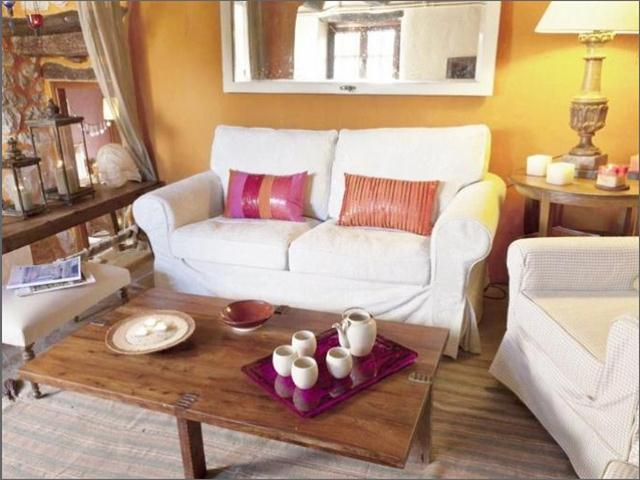

In [183]:
Image("./images/"+pred, width=100,height=100)

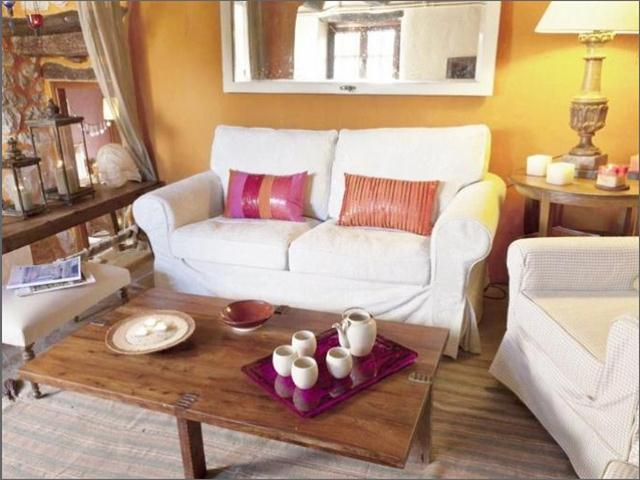

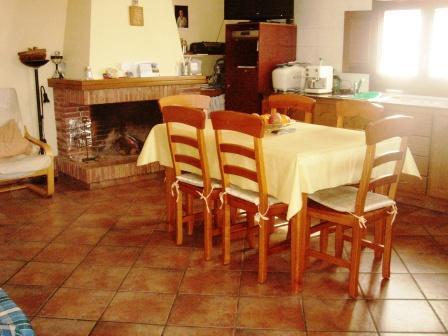

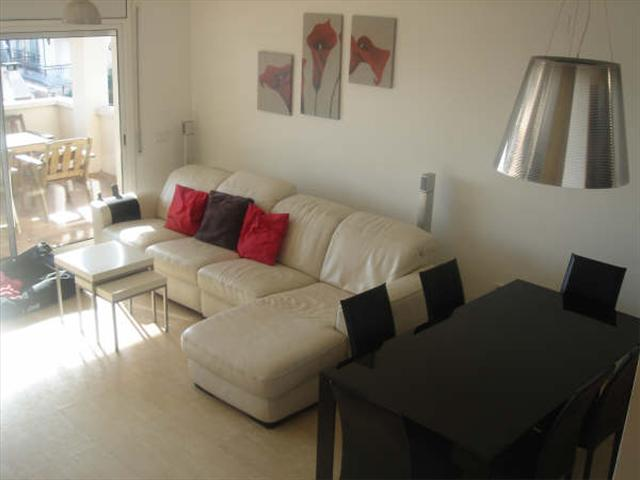

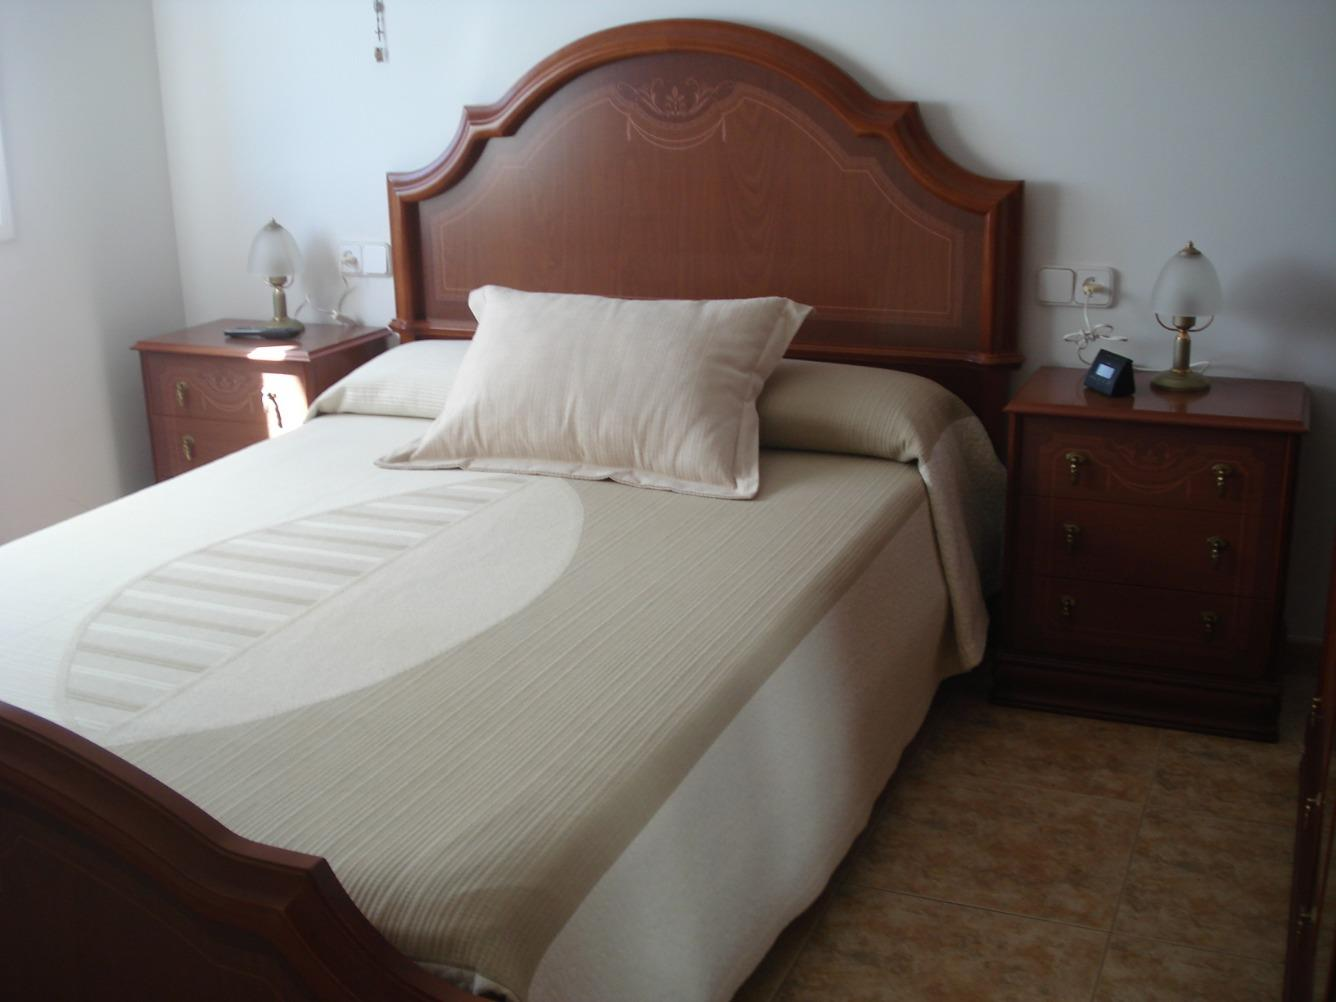

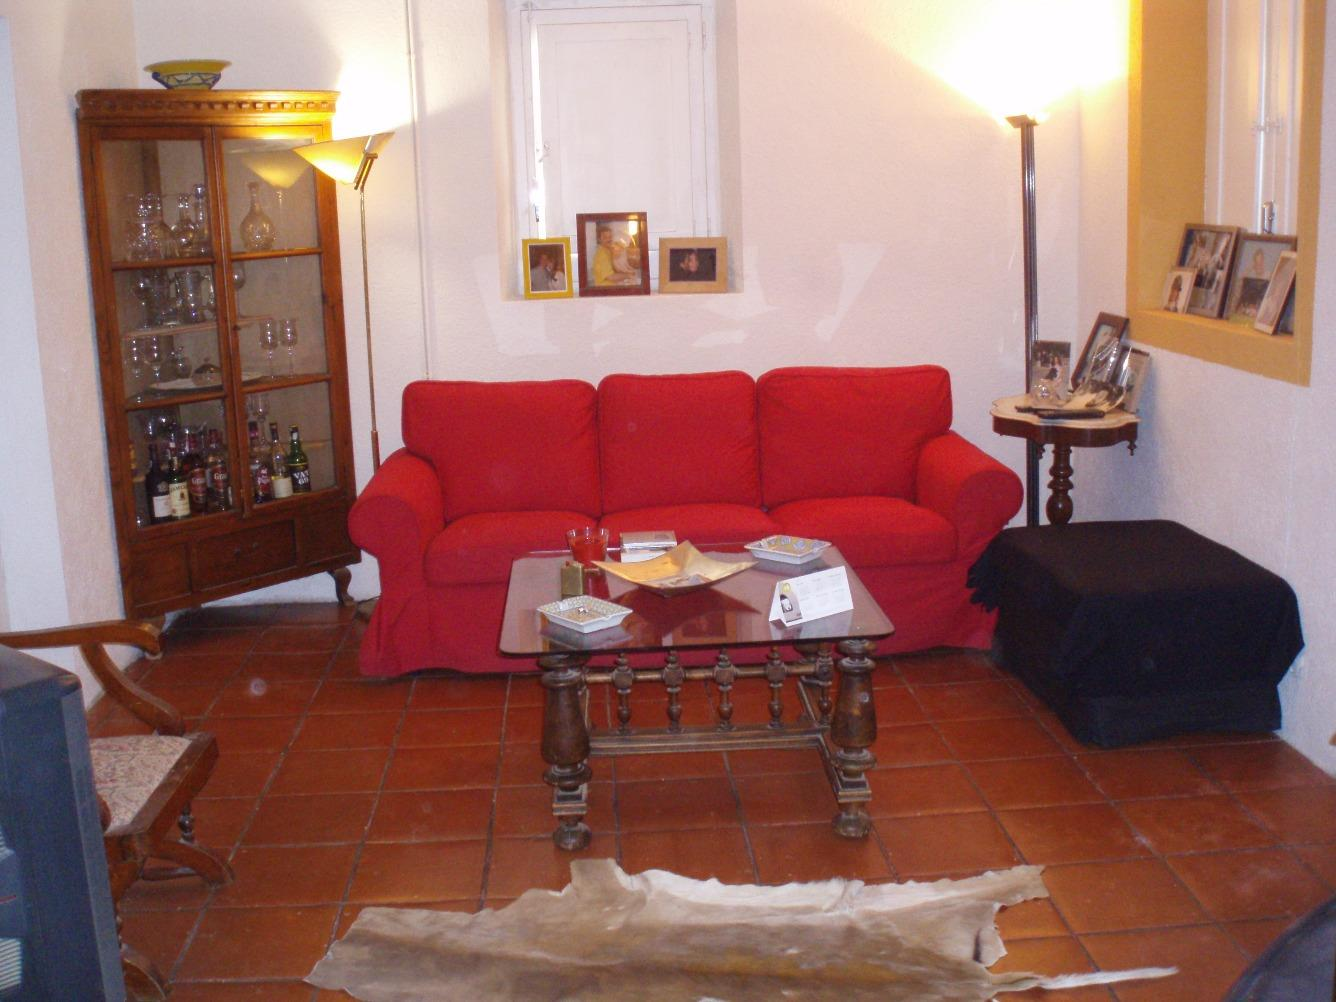

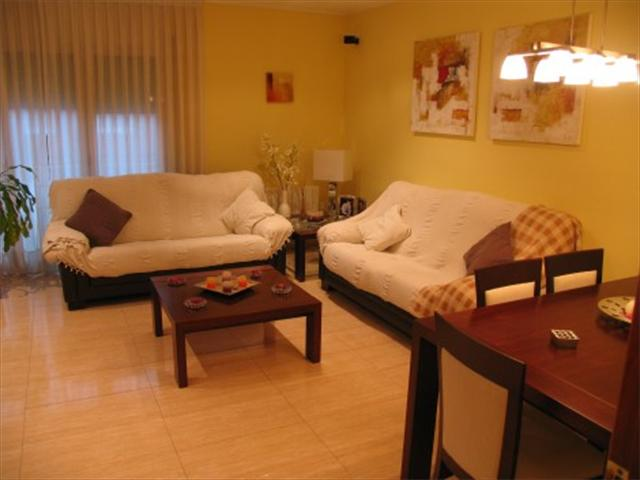

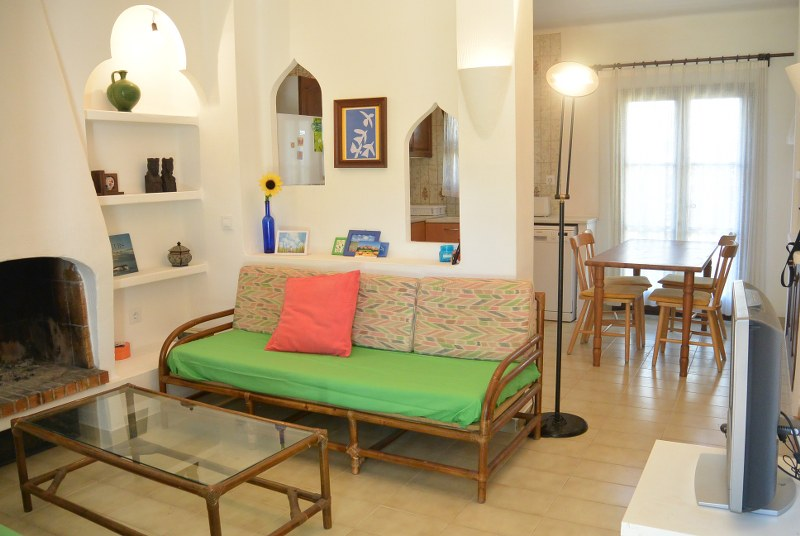

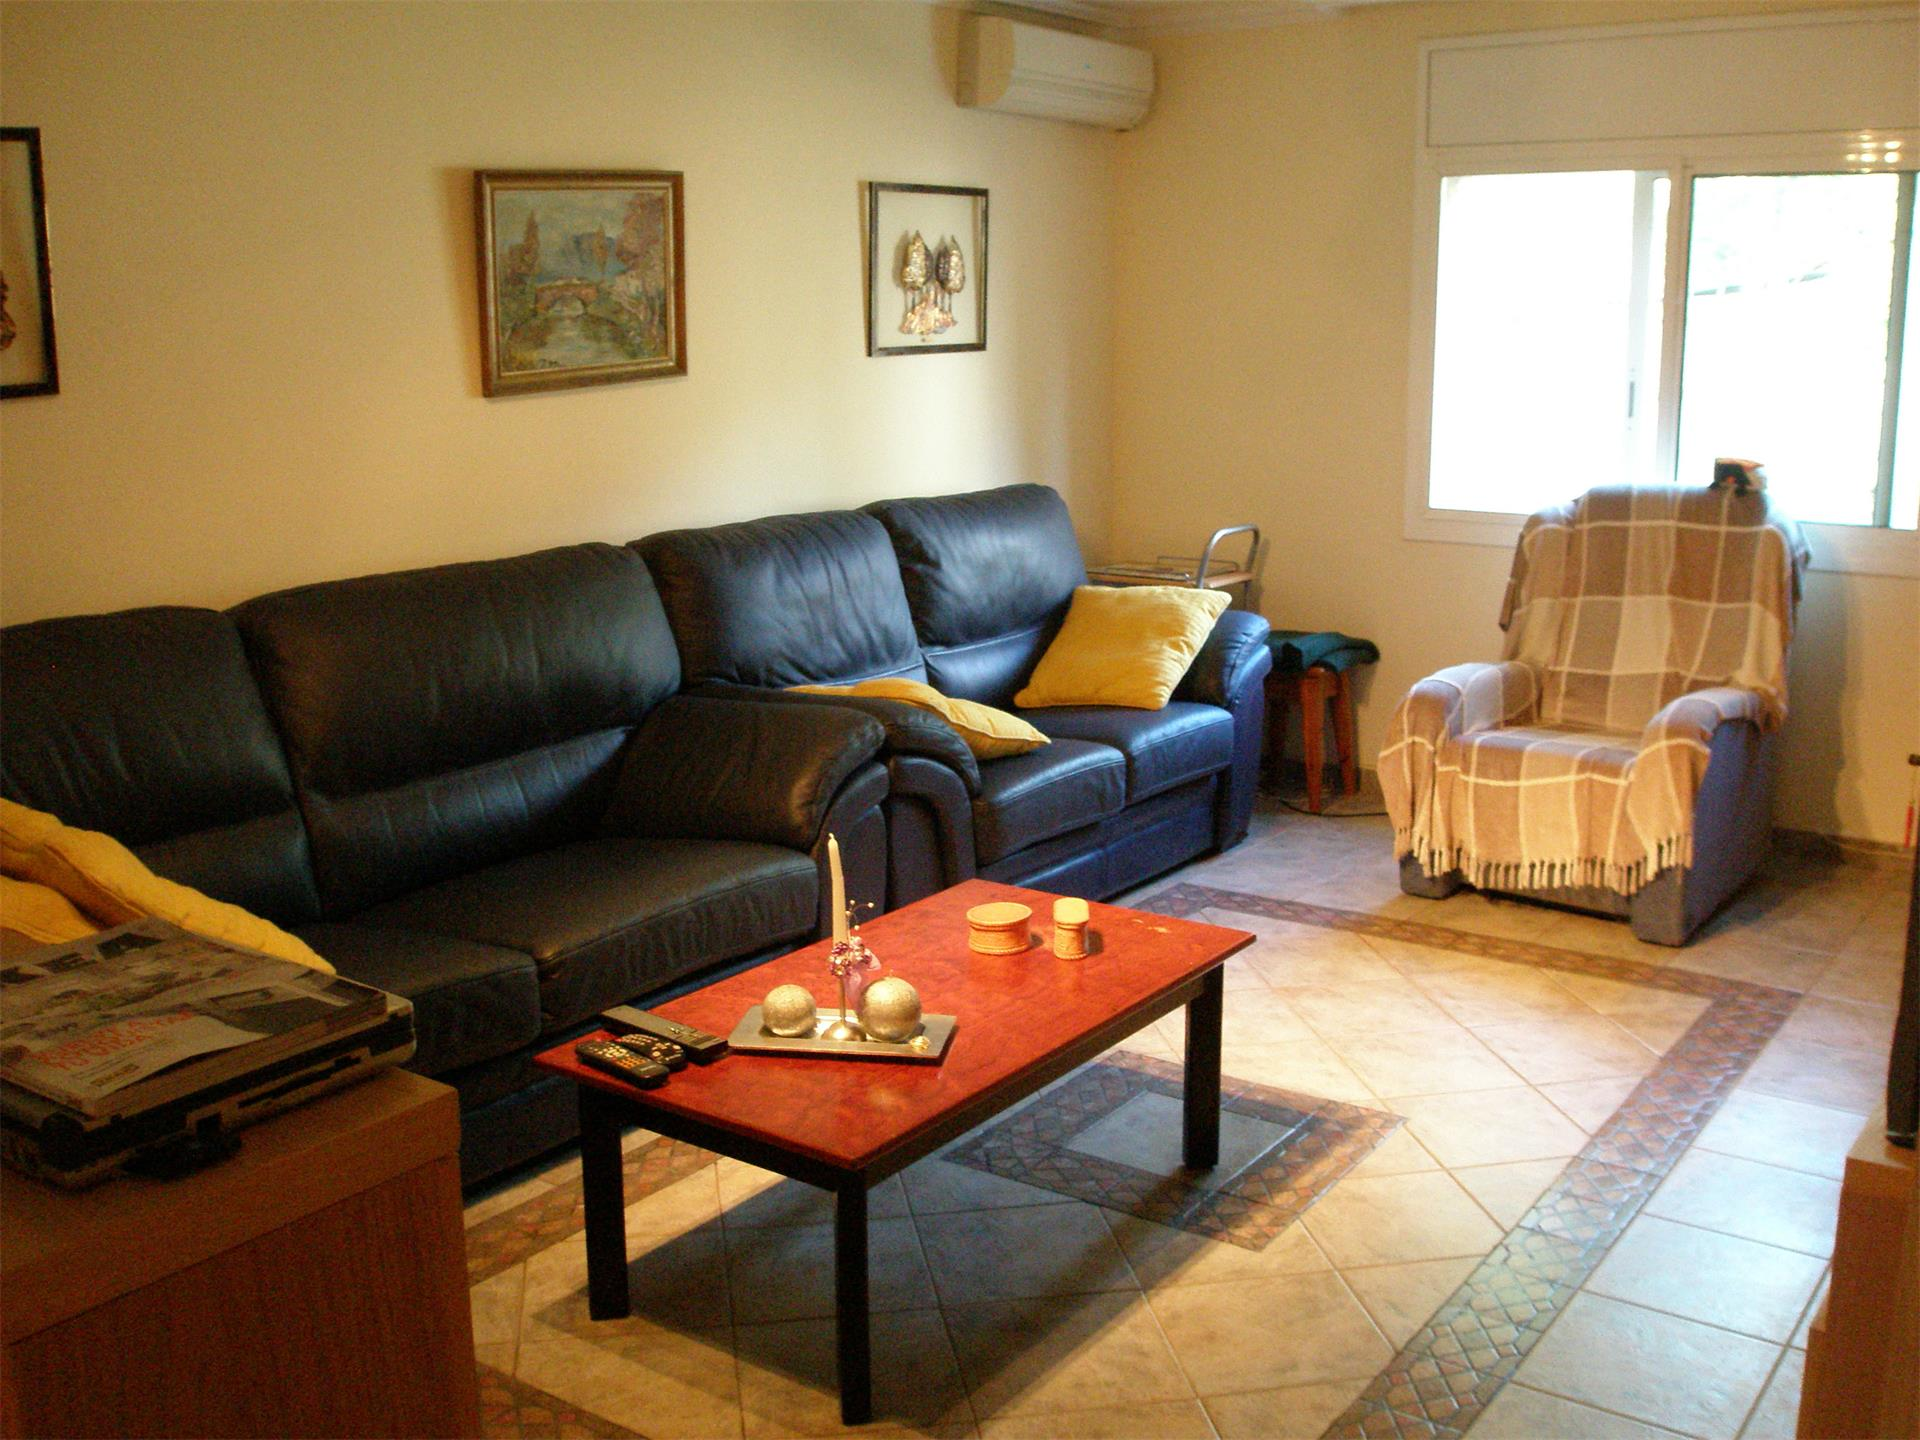

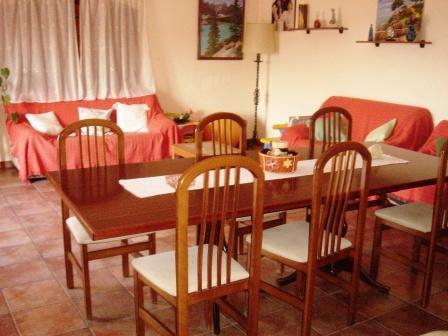

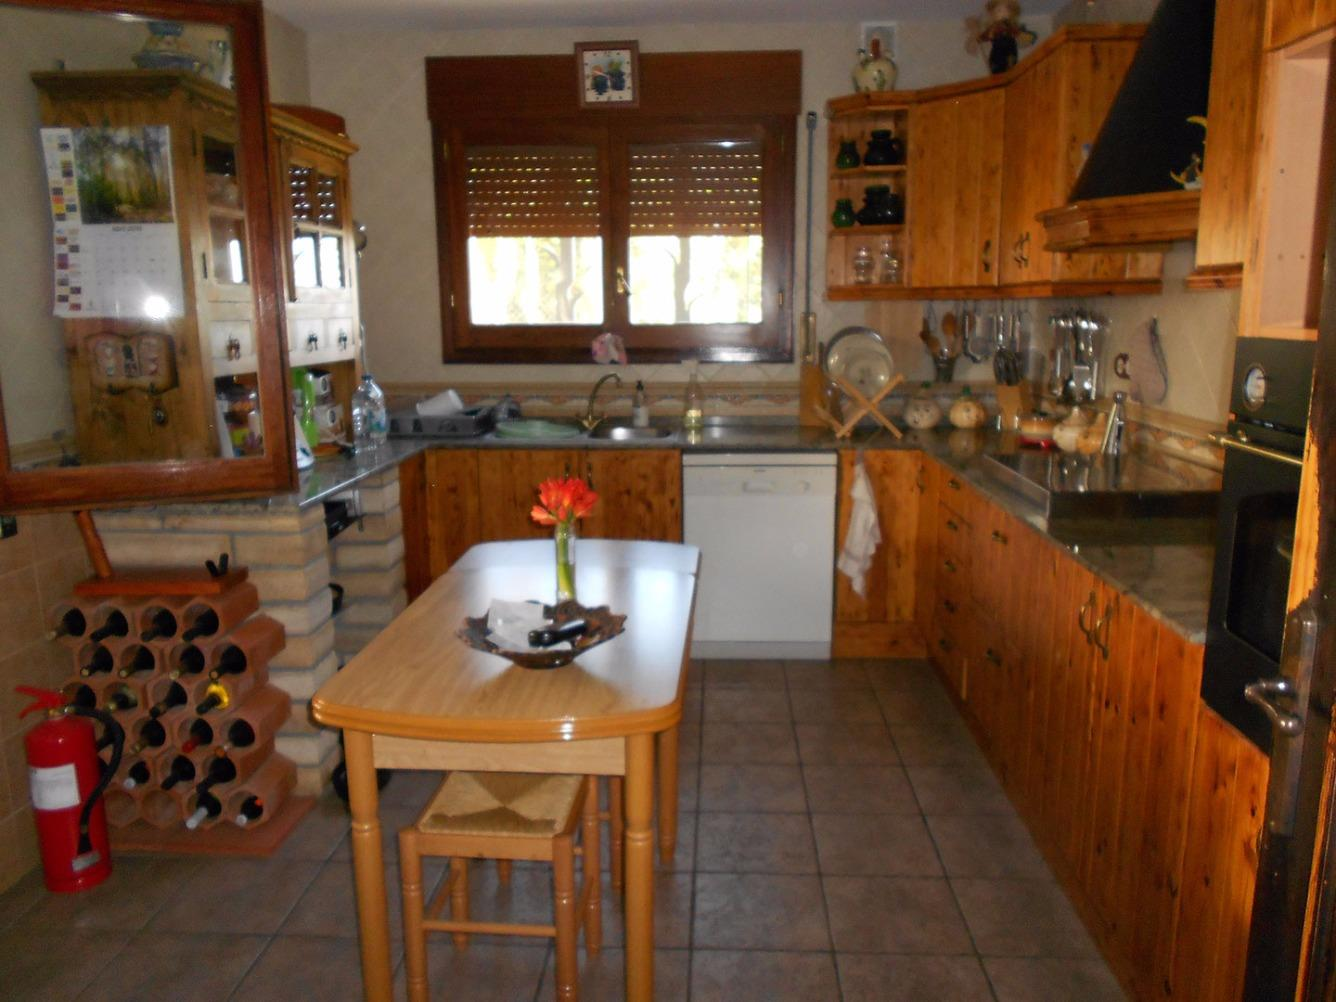

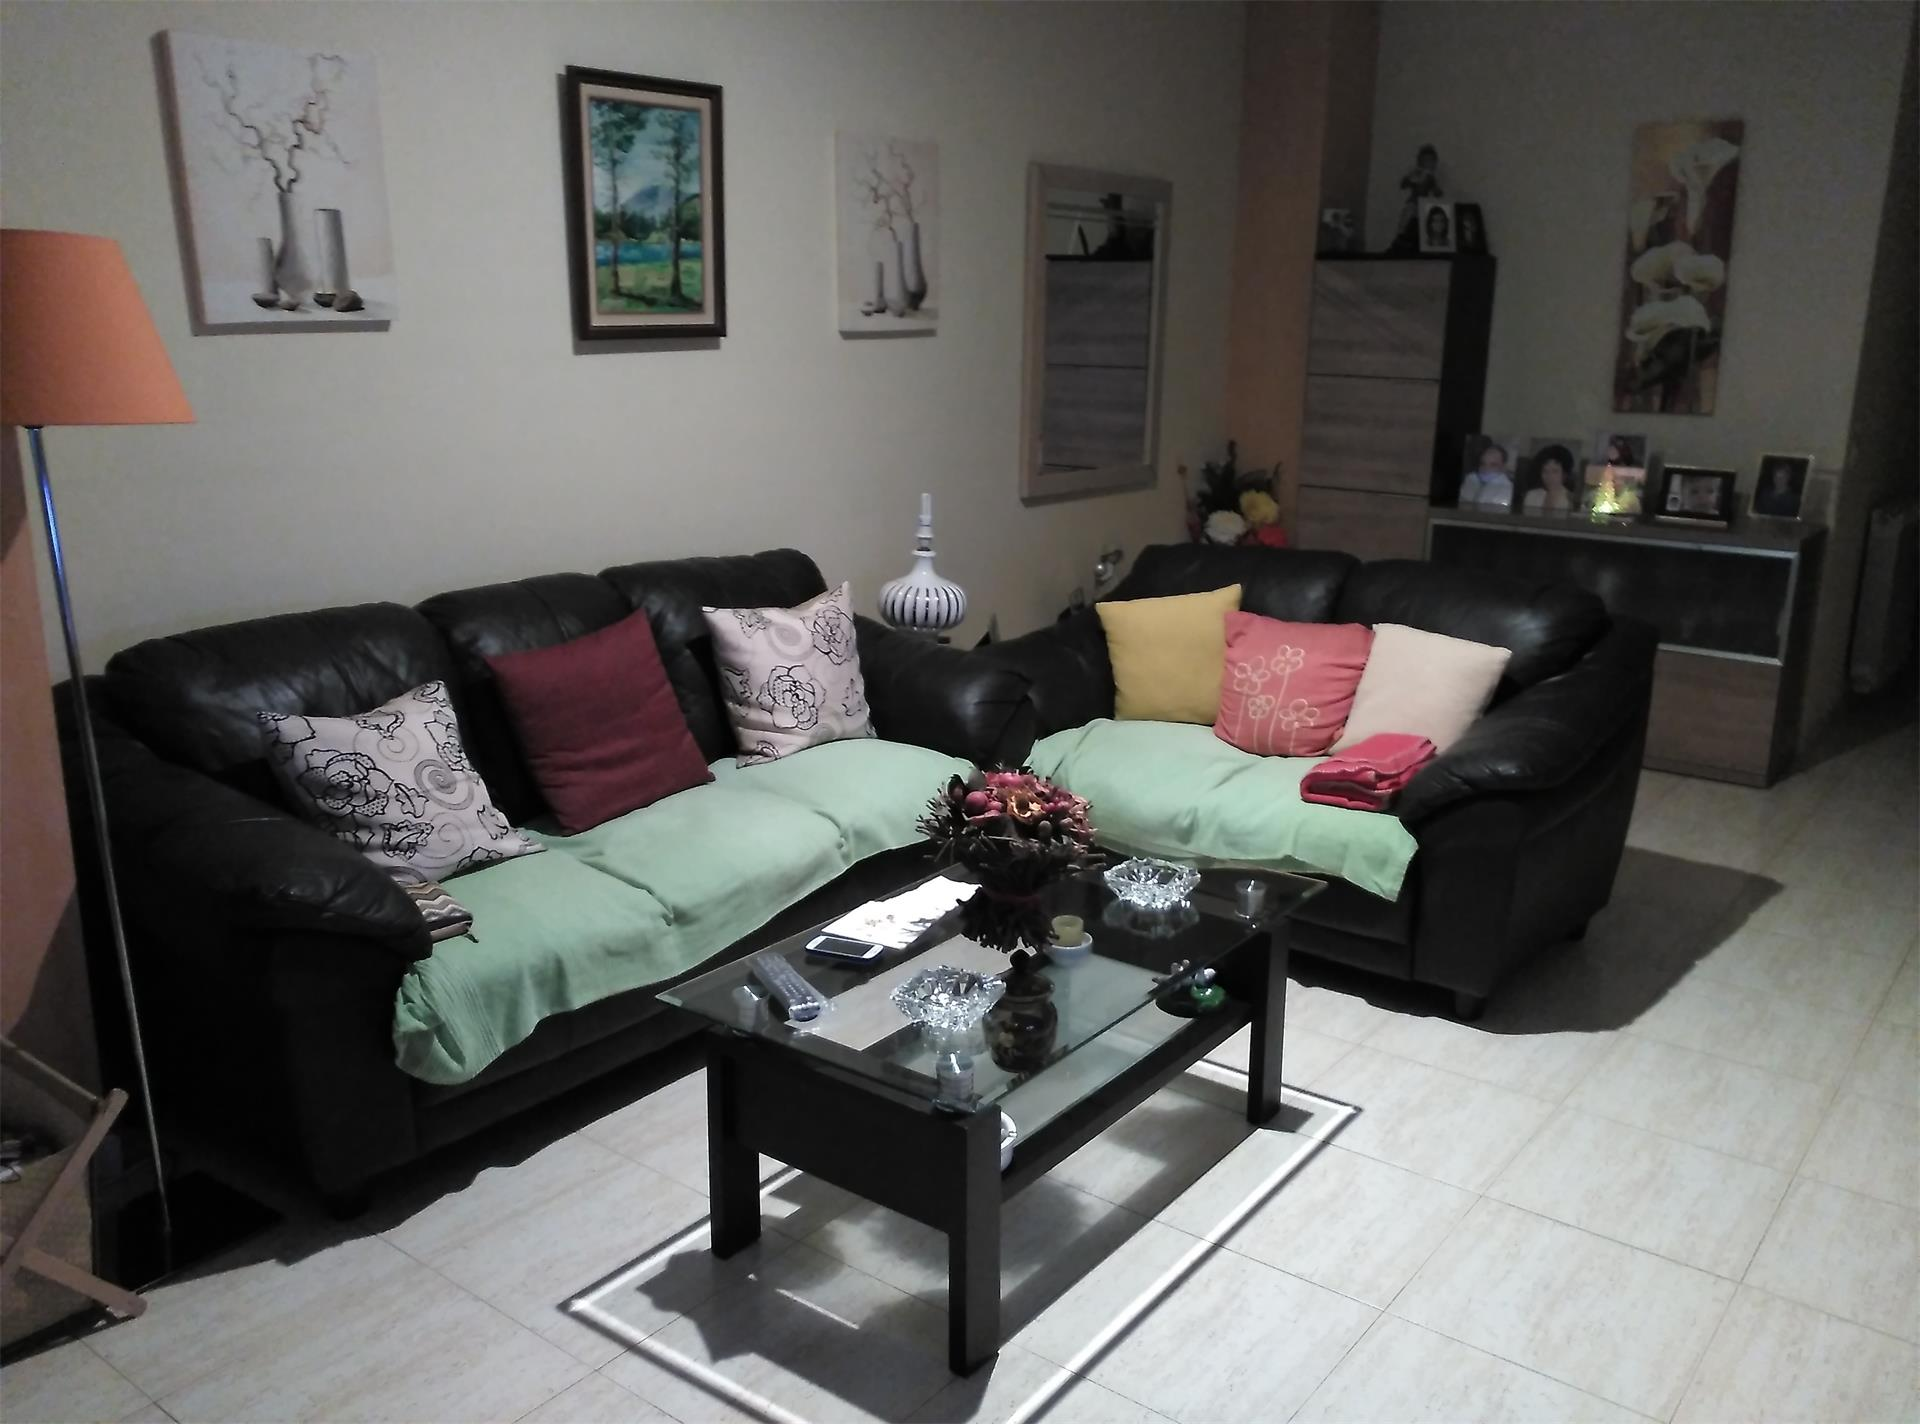

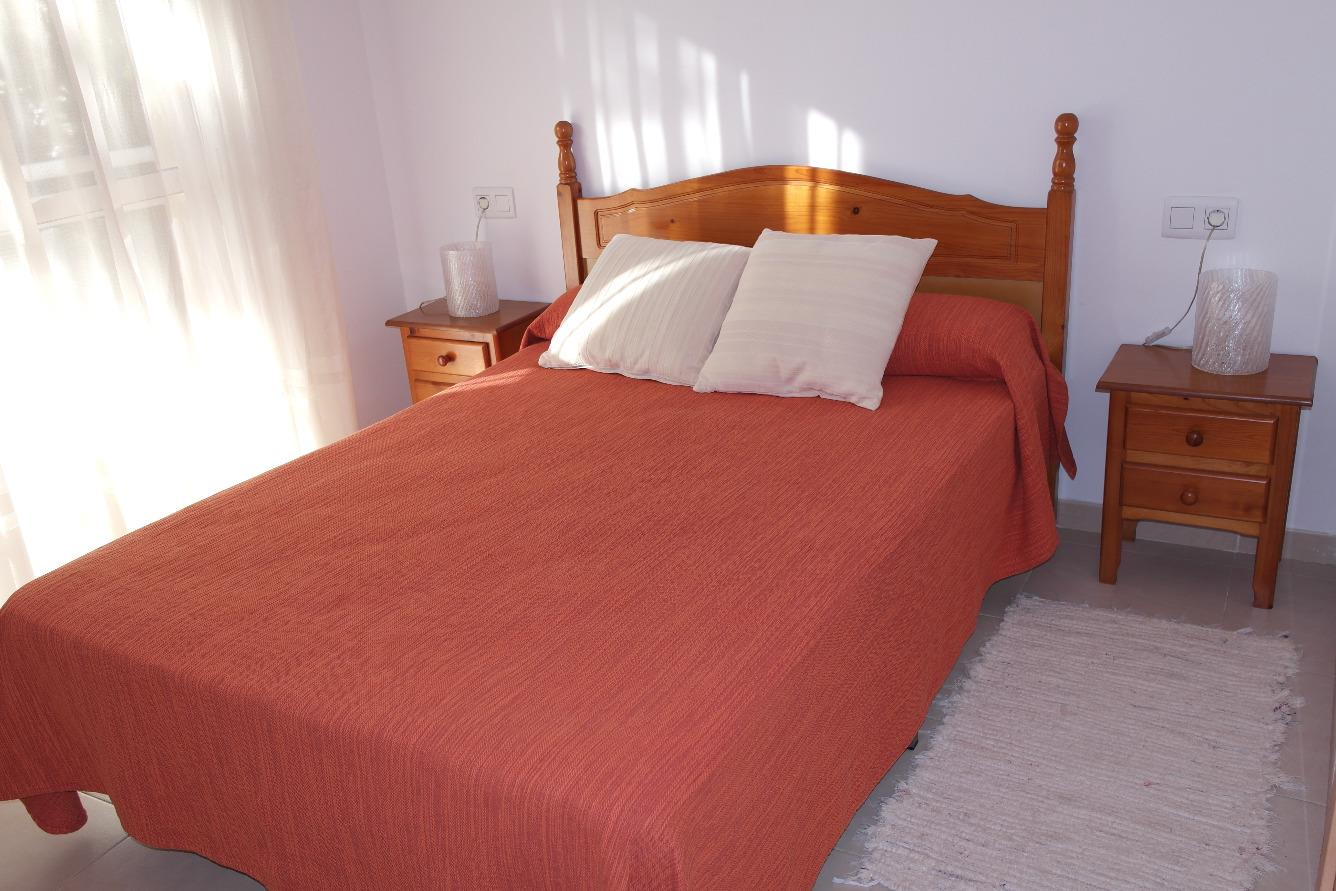

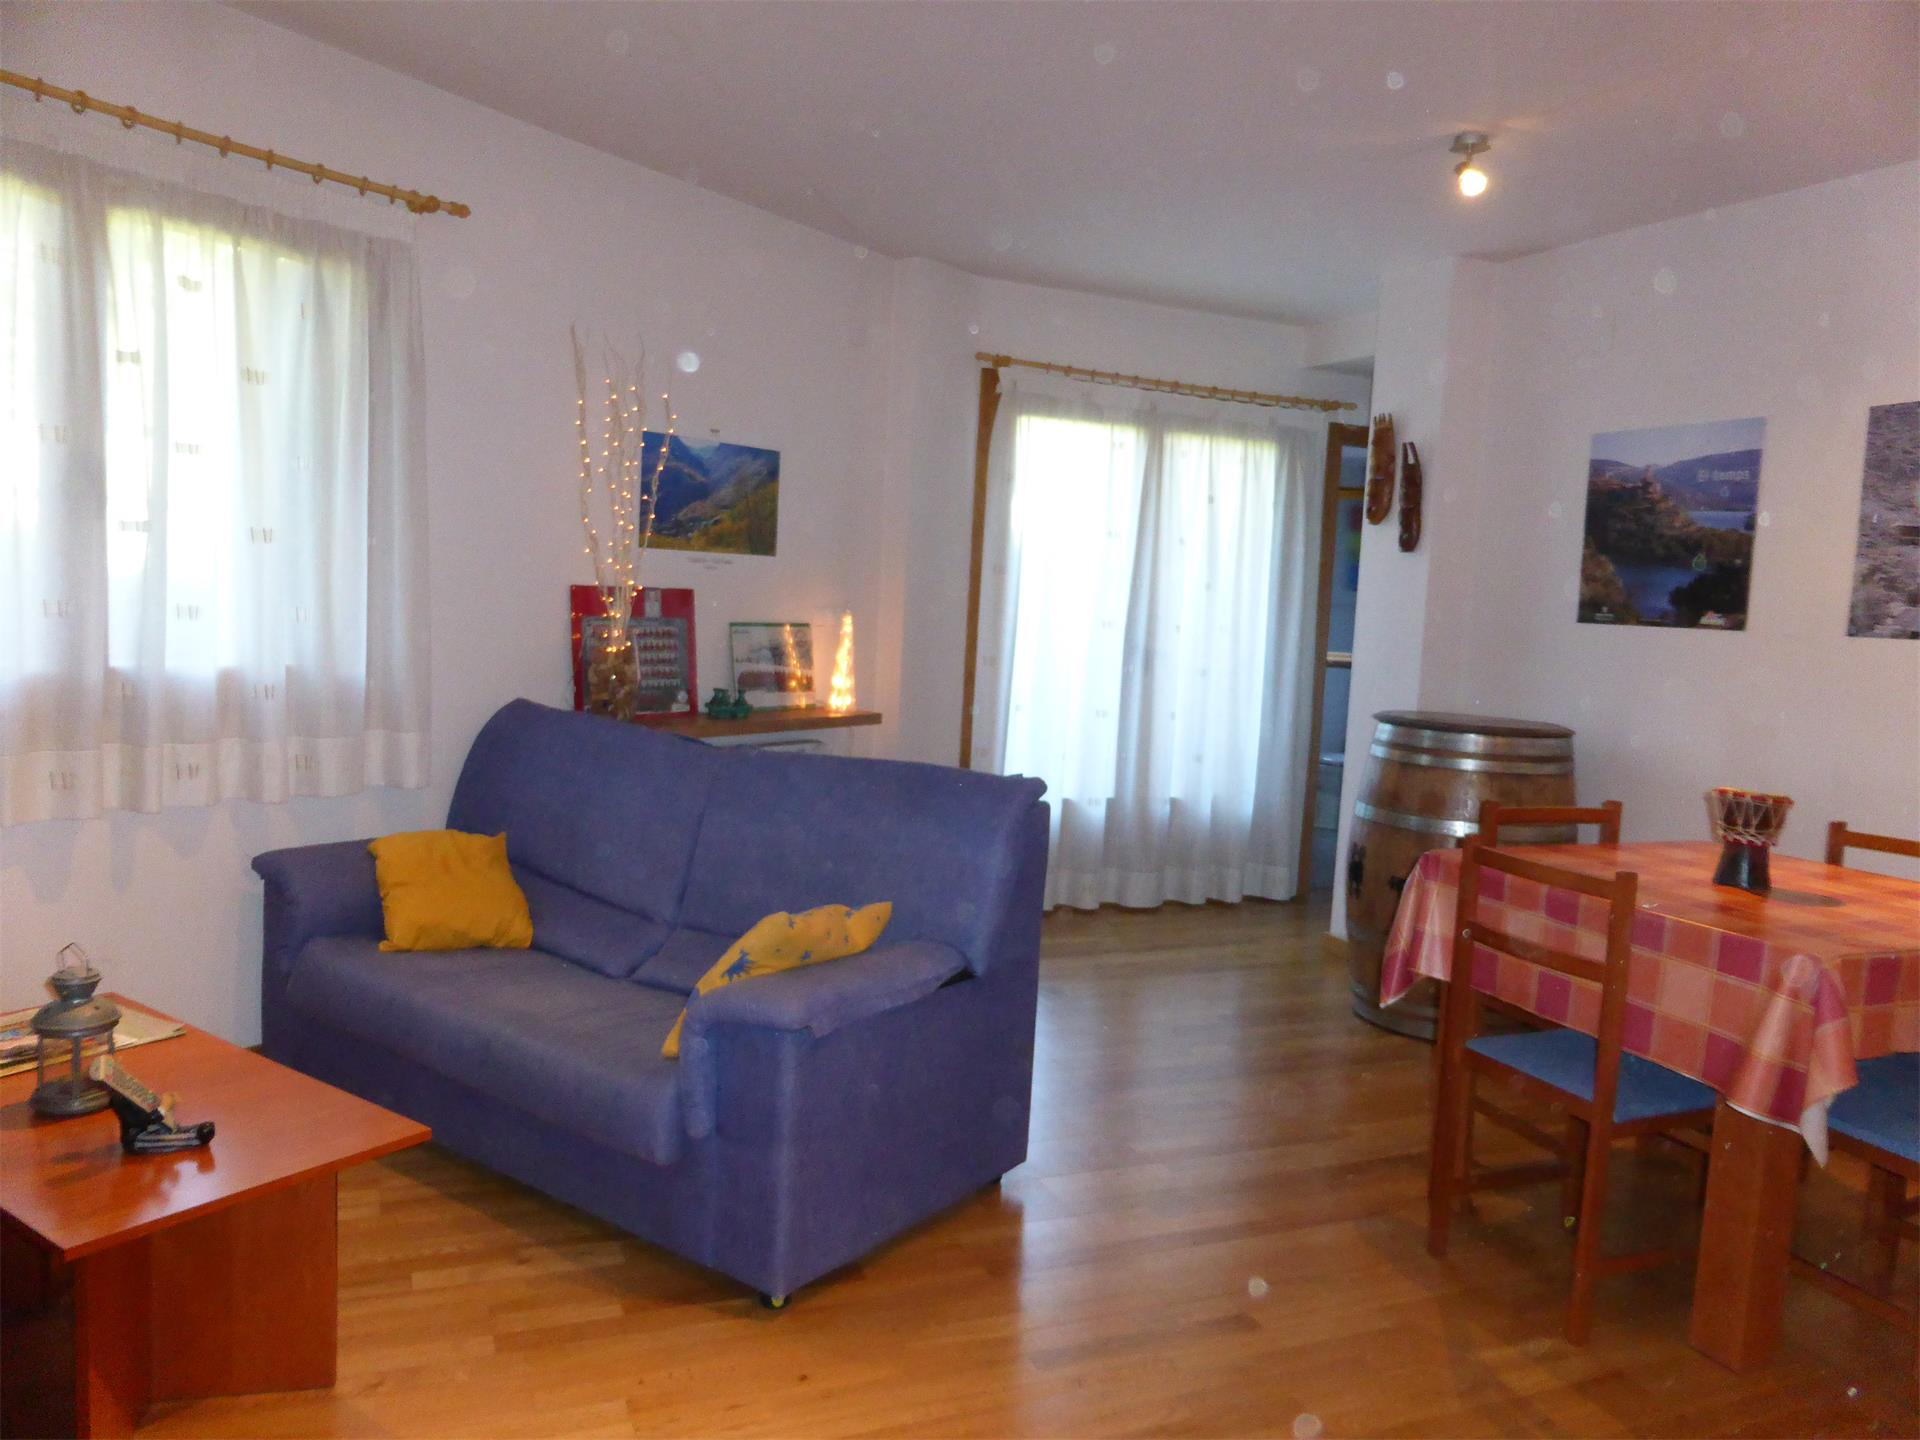

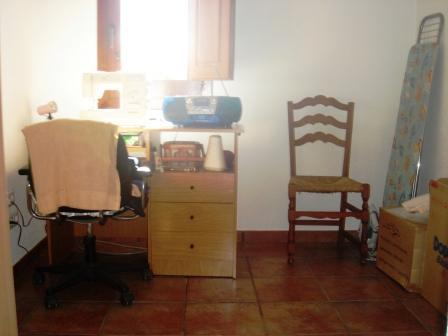

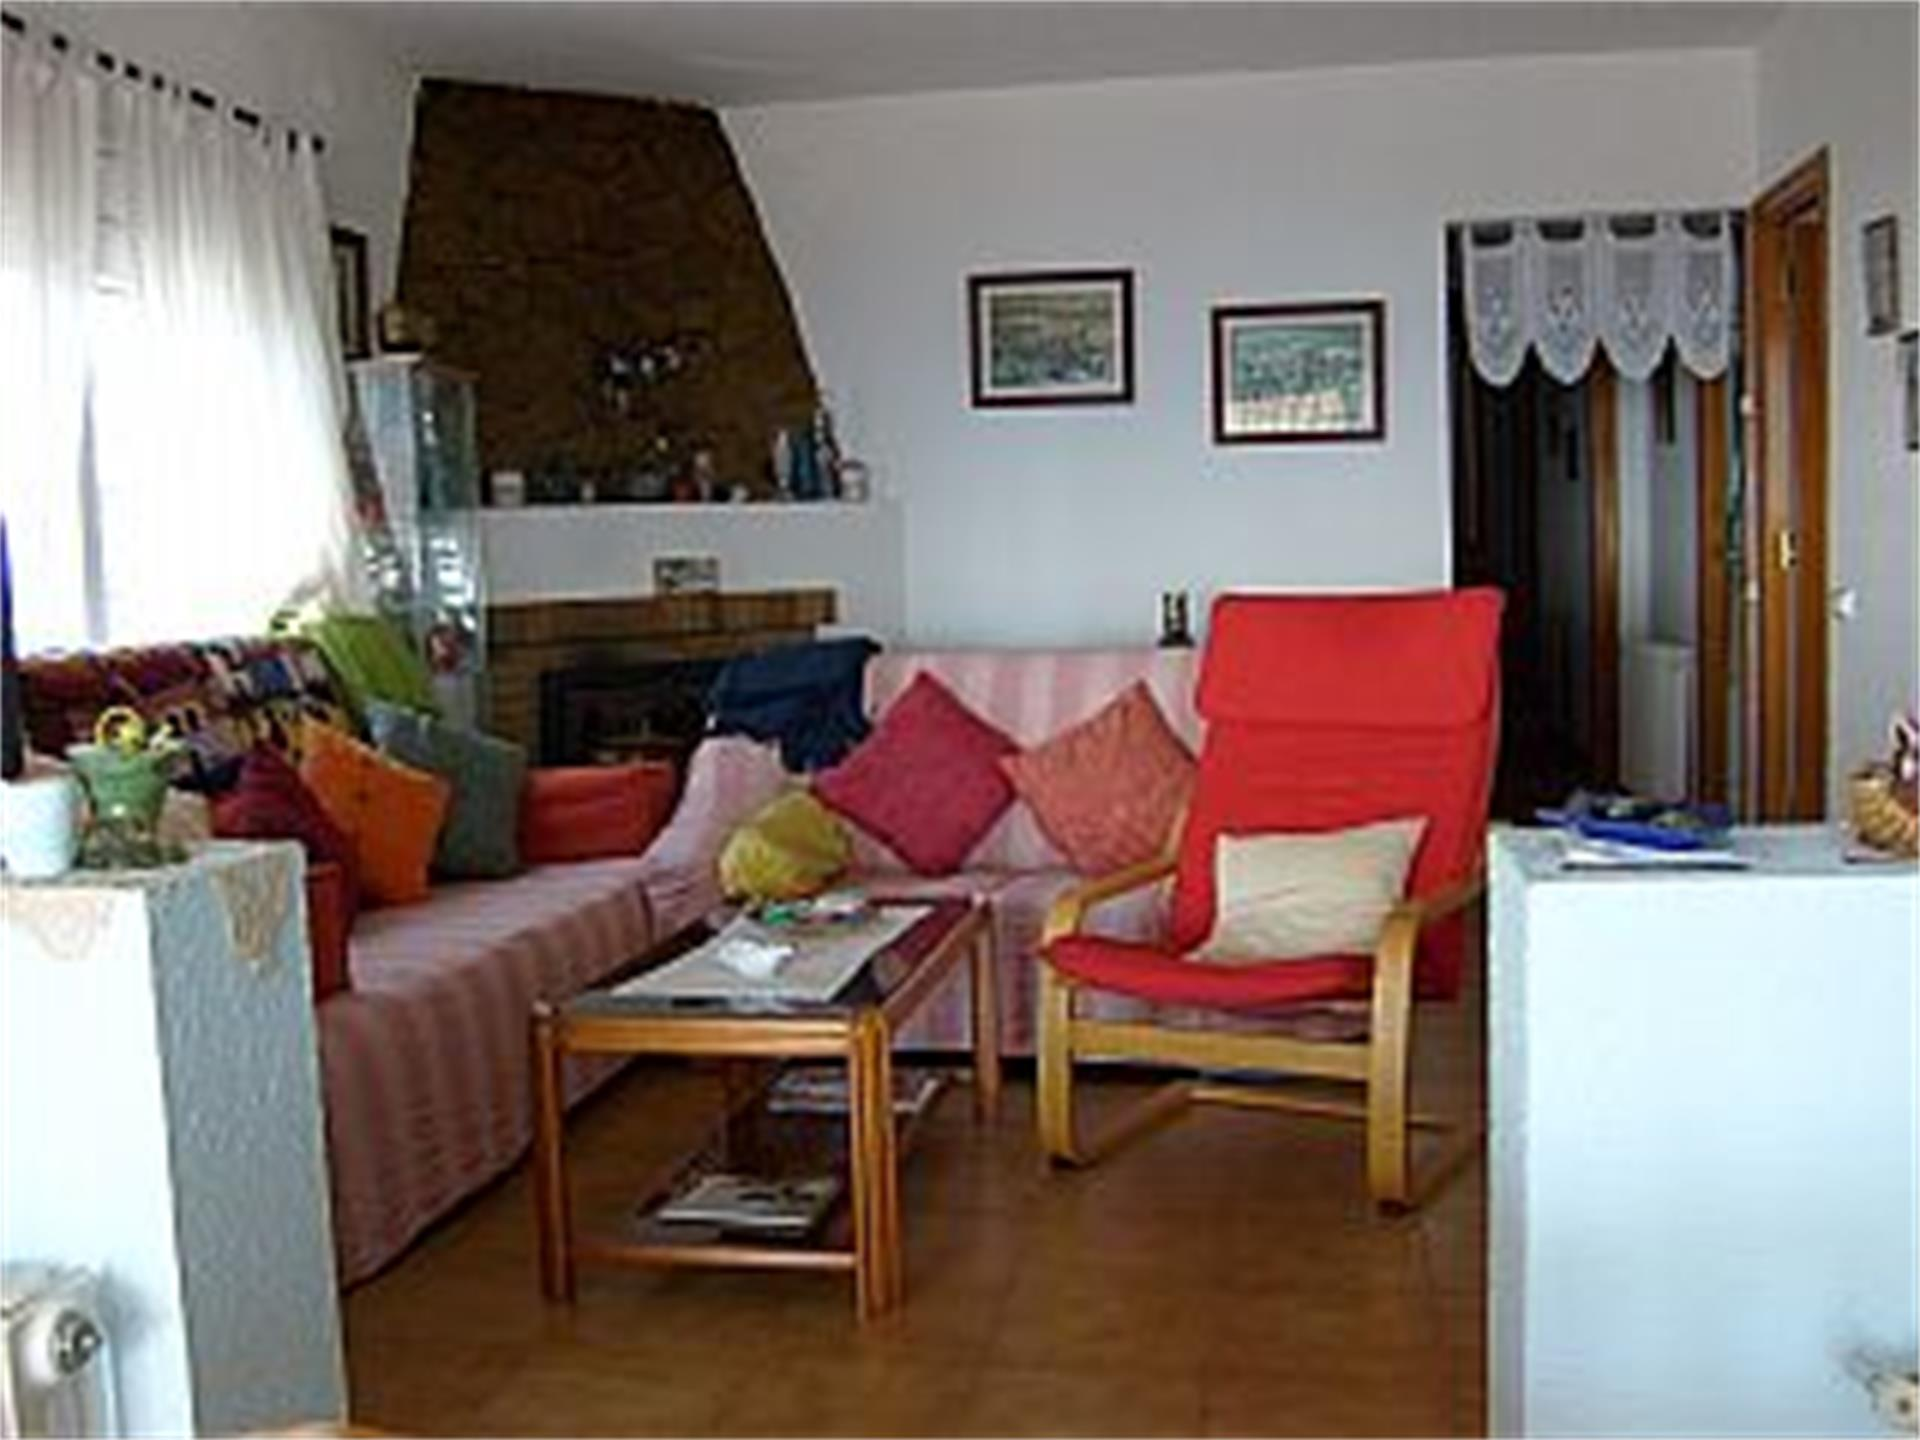

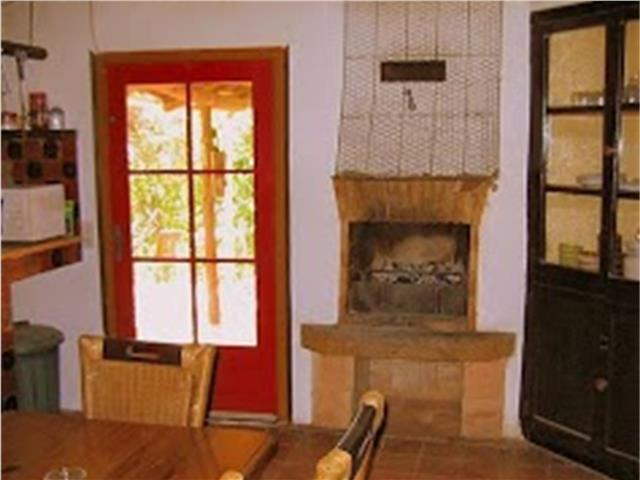

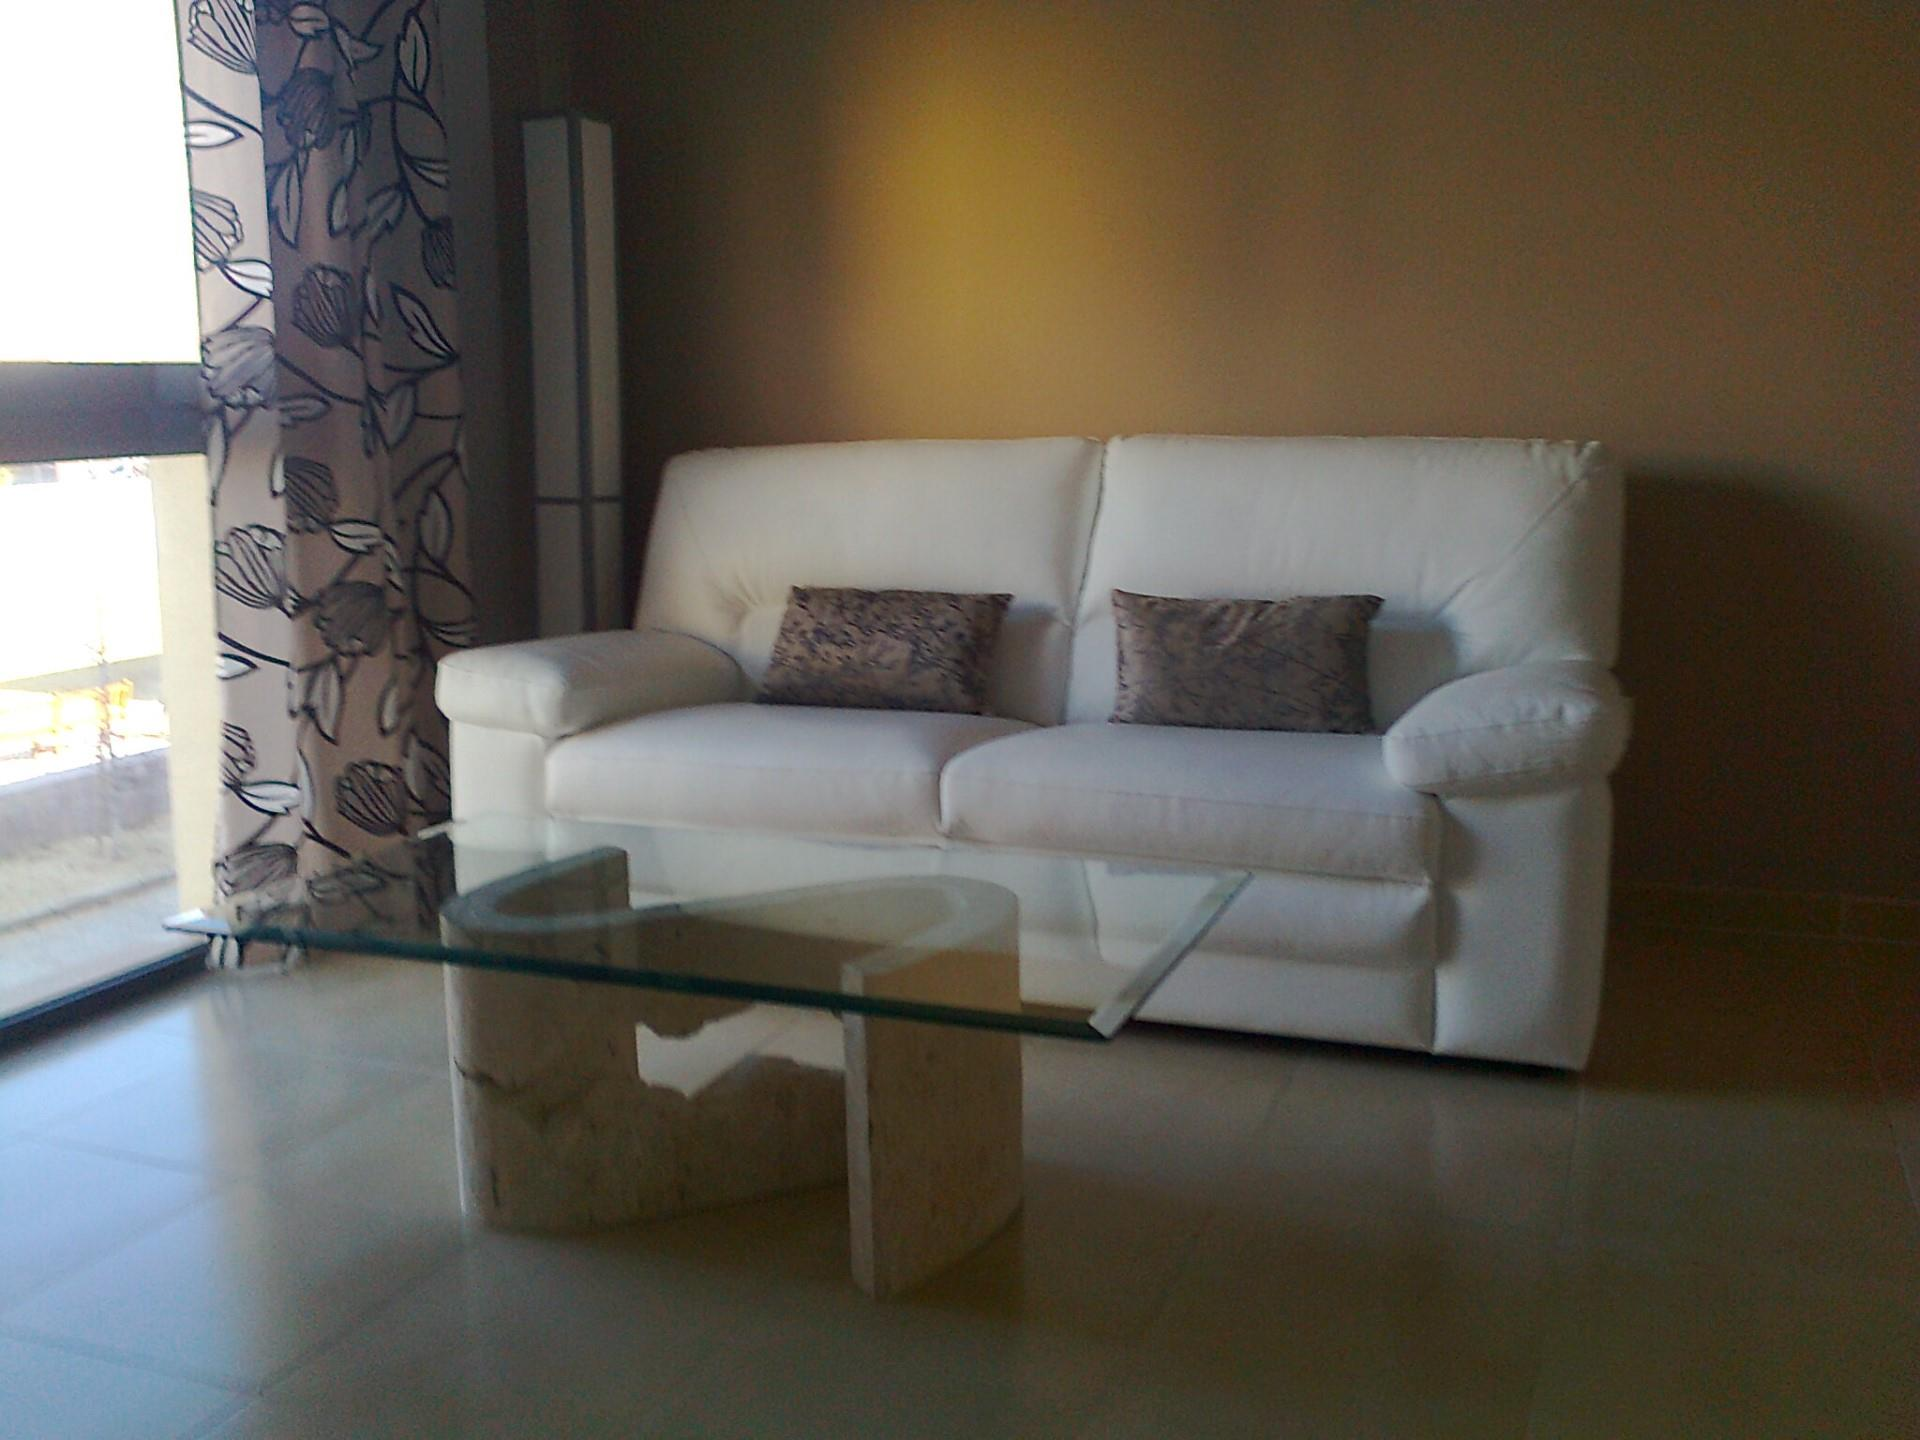

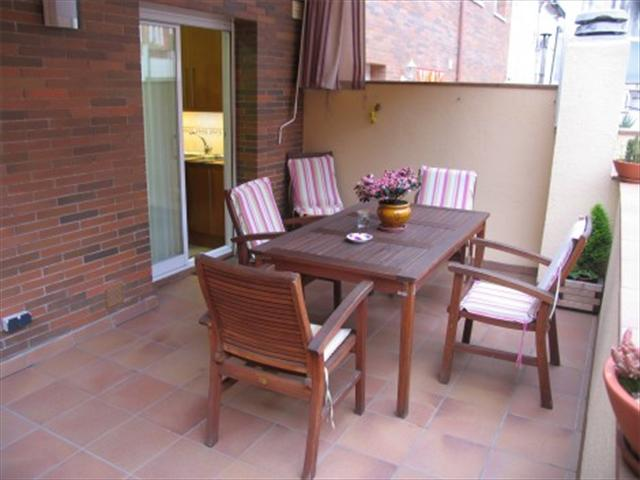

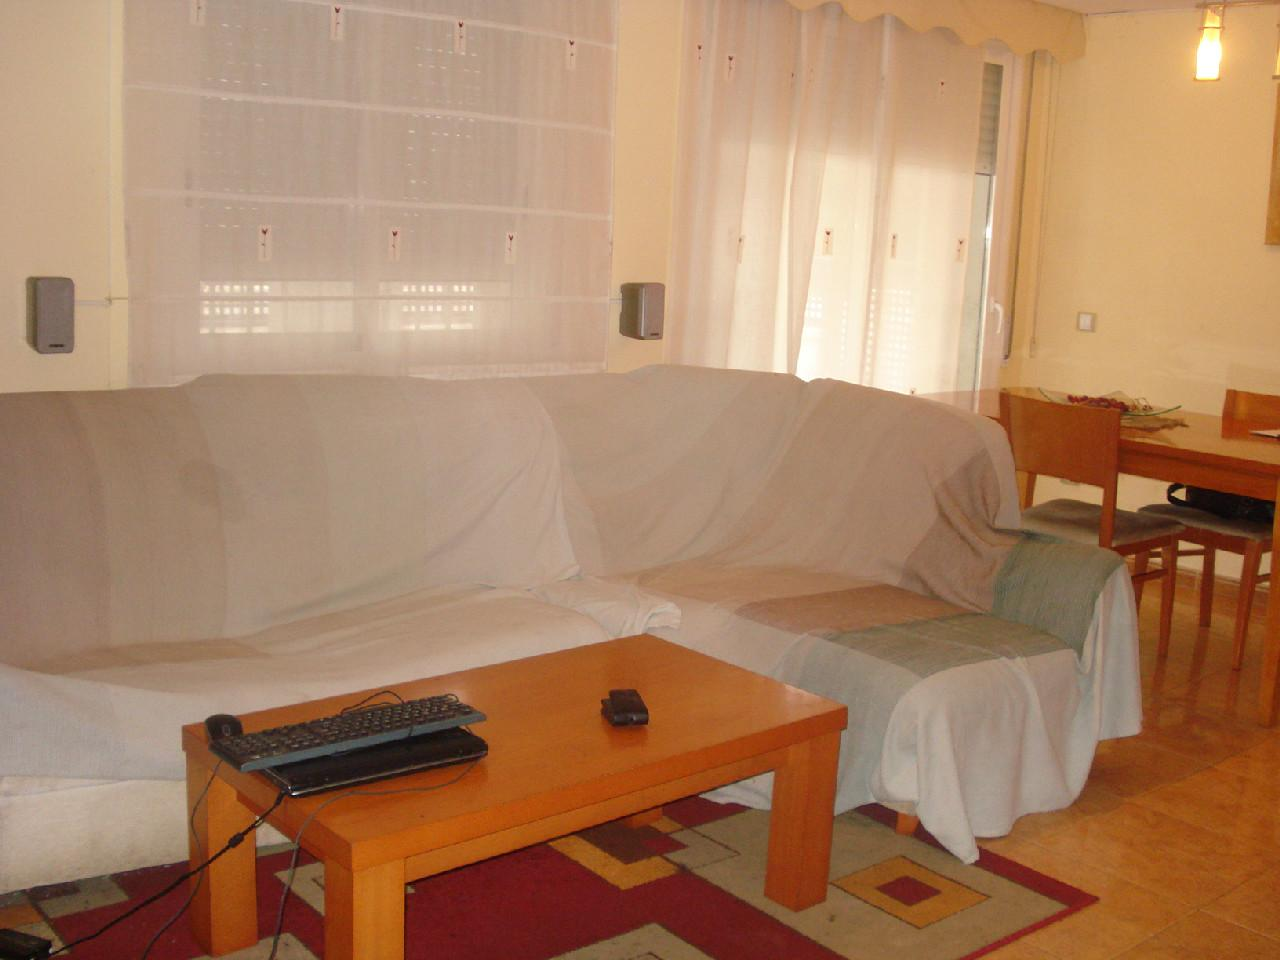

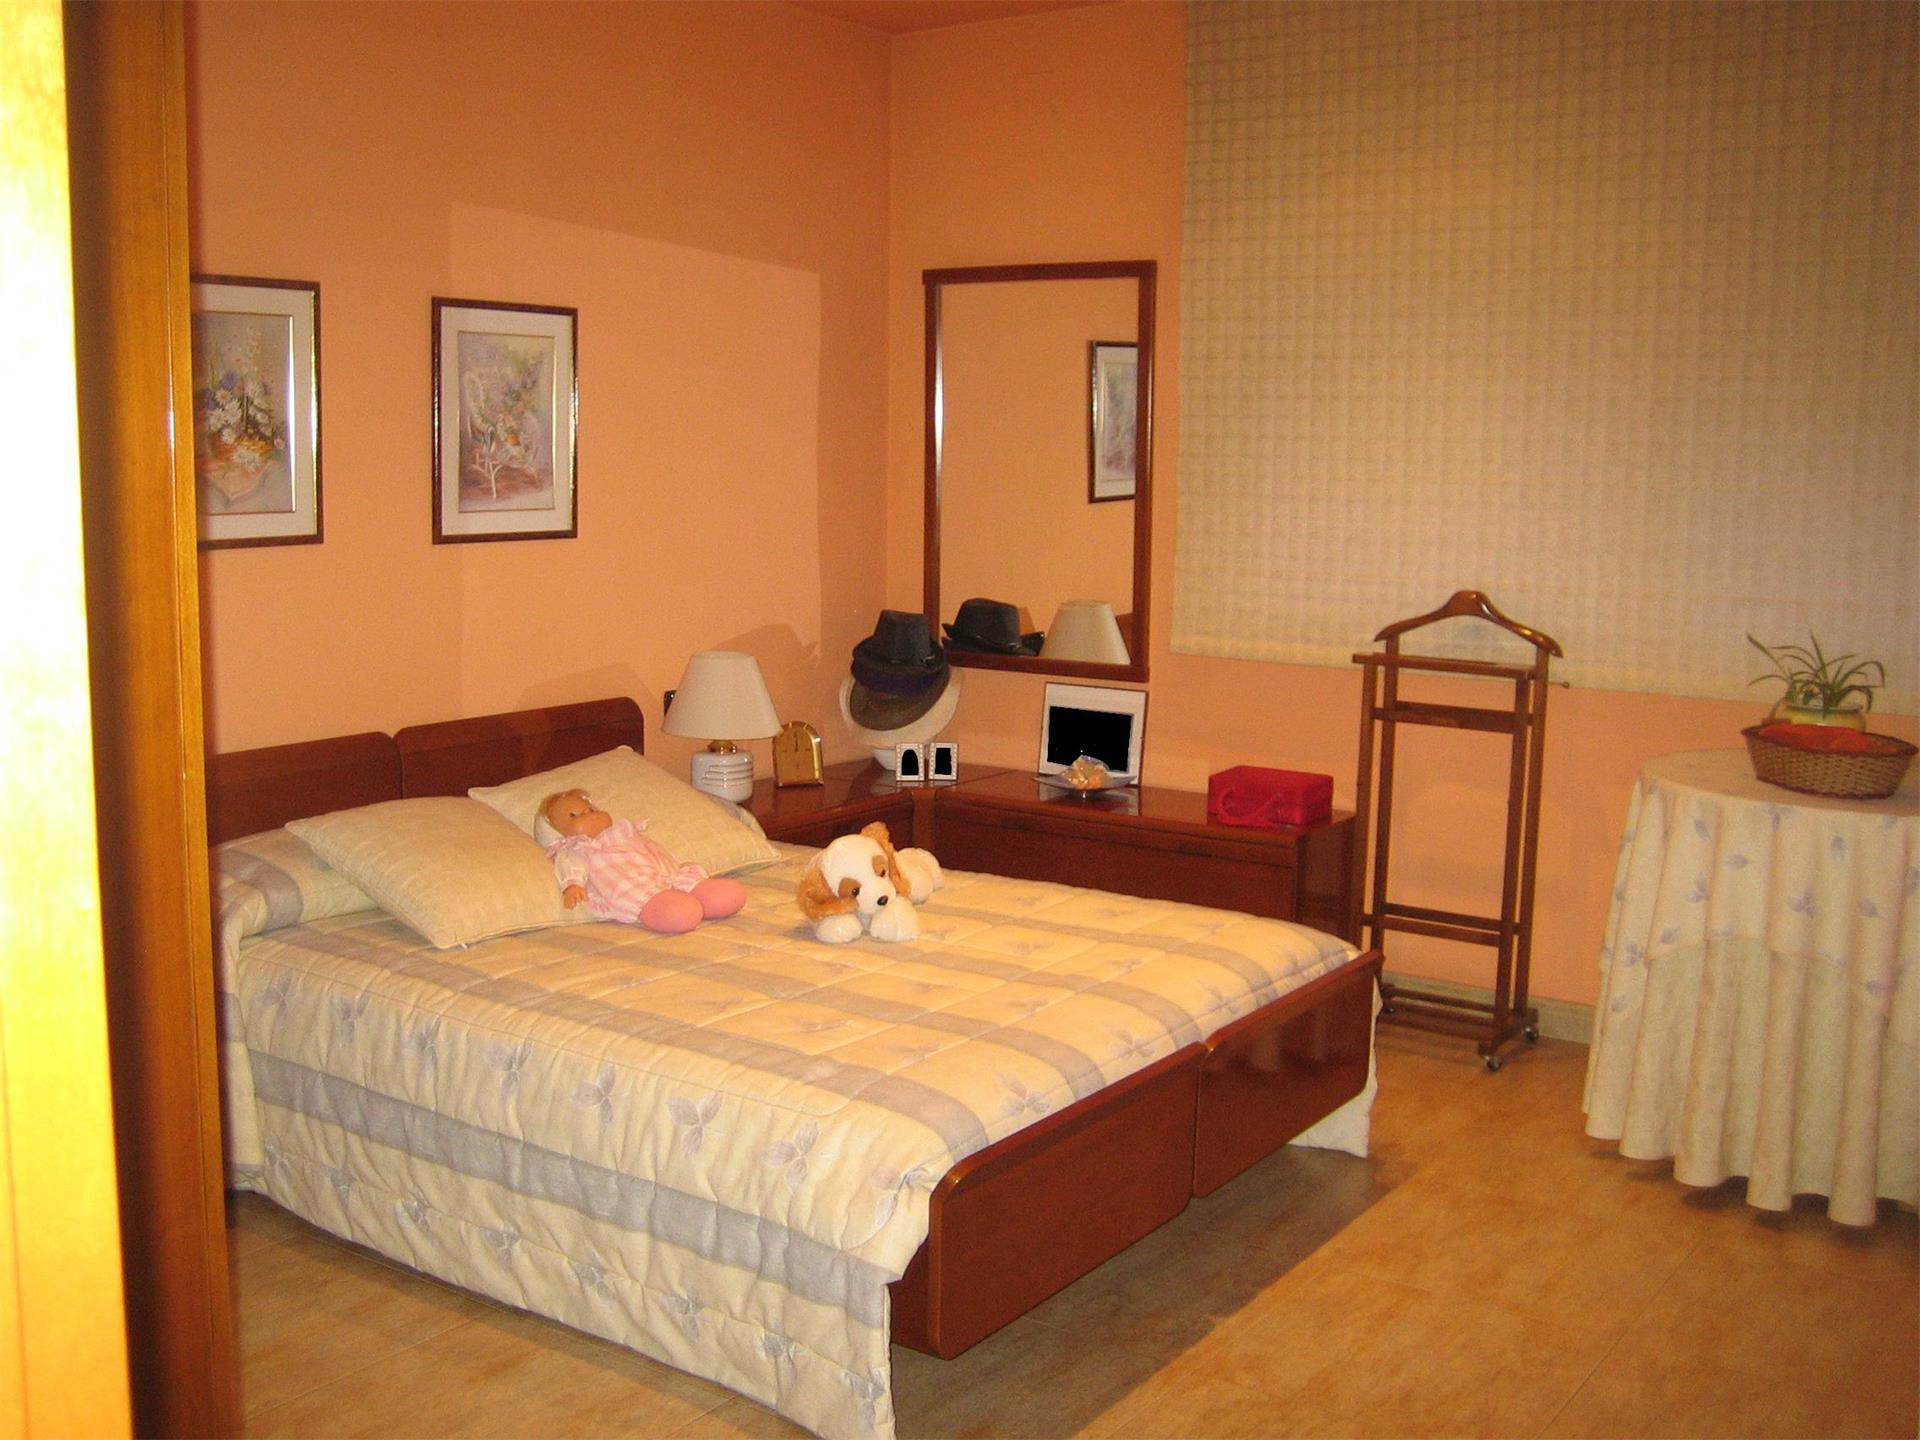

In [191]:
for image in list(df_images_pred.image_path):
    display(Image(image, width=100,height=100))

In [156]:
df_fotocasa = pd.read_pickle('./data/df_fotocasa.pkl')

In [195]:
df_images_pred.head(7)

,image_name,34462969.jpg,idproperty,image_path
0,34462969.jpg,1.000000,abkvpehvdk,/Users/davidquer/Downloads/job_search/adevinta/images/abkvpehvdk/34462969.jpg
1,34802160.jpg,0.284685,ldzrqbteaa,/Users/davidquer/Downloads/job_search/adevinta/images/ldzrqbteaa/34802160.jpg
2,76083630.jpg,0.279214,asnvfuwtaa,/Users/davidquer/Downloads/job_search/adevinta/images/asnvfuwtaa/76083630.jpg
3,50387454.jpg,0.276008,blwikzinyd,/Users/davidquer/Downloads/job_search/adevinta/images/blwikzinyd/50387454.jpg
4,36050974.jpg,0.276007,egziggsrad,/Users/davidquer/Downloads/job_search/adevinta/images/egziggsrad/36050974.jpg
5,59708439.jpg,0.274229,aeunvoqpfk,/Users/davidquer/Downloads/job_search/adevinta/images/aeunvoqpfk/59708439.jpg
6,82808580.jpg,0.273690,phukchotwy,/Users/davidquer/Downloads/job_search/adevinta/images/phukchotwy/82808580.jpg


In [197]:
pd.merge(df_images_pred.head(7),df_fotocasa,how='left',on='idproperty')[['idproperty','province','municipality','surface',
   'rooms','baths','price','property_subtype']] \
    .groupby('idproperty').first().reset_index()

,idproperty,province,municipality,surface,rooms,baths,price,property_subtype
0,abkvpehvdk,Barcelona,Sant Pere de Ribes,700,7,7,750000.000000,Finca rústica
1,aeunvoqpfk,Barcelona,Caldes de Montbui,270,5,4,340000.000000,Casa adosada
2,asnvfuwtaa,Tarragona,Calafell,220,4,3,200000.000000,Casa-Chalet
3,blwikzinyd,Tarragona,La Pobla de Montornès,150,3,2,220000.000000,Casa adosada
4,egziggsrad,Barcelona,Cànoves I Samalús,376,5,2,650000.000000,Casa-Chalet
5,ldzrqbteaa,Girona,Sant Feliu de Buixalleu,342,8,4,485000.000000,Finca rústica
6,phukchotwy,Girona,Pals,90,3,2,165.714286,Casa adosada


In [160]:
pd.set_option('display.max_colwidth', 1)

df_fotocasa[
    df_fotocasa.idproperty.isin(df_images_pred.idproperty.unique())
][['idproperty','province','municipality','surface',
   'rooms','baths','price','property_subtype']] \
    .groupby('idproperty').first().reset_index()

,idproperty,province,municipality,surface,rooms,baths,price,property_subtype
0,blwikzinyd,Tarragona,La Pobla de Montornès,150,3,2,220000.0,Casa adosada
1,edwosrcnjc,Lleida,Vielha e Mijaran,40,1,1,137000.0,Apartamento
2,nathkabiph,Barcelona,L'Hospitalet de Llobregat,71,2,1,350000.0,Piso
3,pdgmndkaii,Girona,Palafrugell,120,3,2,670000.0,Piso
4,ttpubkjzaq,Girona,Lloret de Mar,200,4,4,685000.0,Piso
5,uqoixdbcuh,Tarragona,Prades,200,4,3,260000.0,Casa-Chalet
6,urdnemmtms,Barcelona,Sitges,300,7,7,1150000.0,Casa-Chalet
7,urpuzyvotn,Barcelona,L'Esquirol,408,4,2,250000.0,Finca rústica
8,wezgfjifon,Lleida,Esterri d'Àneu,90,3,2,121000.0,Dúplex
9,xncizfqizu,Barcelona,Barcelona Capital,240,5,4,2600000.0,Piso
